# Predict Clicked Ads Customer Classification by using Machine Learning

Mini project by Rakamin Academy

- Wika Rabila Putri (DS 41 & JAP 28)

## Overview
Sebuah perusahaan di Indonesia ingin mengetahui efektifitas sebuah iklan yang mereka tayangkan, hal ini penting bagi perusahaan agar dapat mengetahui seberapa besar ketercapainnya iklan yang dipasarkan sehingga dapat menarik customers untuk melihat iklan.
Dengan mengolah data historical advertisement serta menemukan insight serta pola yang terjadi, maka dapat membantu perusahaan dalam menentukan target marketing, fokus case ini adalah membuat model machine learning classification yang berfungsi menentukan target customers yang tepat.

## Masalah yang dihadapi

Perusahaan ingin mengetahui seberapa efektif iklan yang mereka tayangkan dalam menarik perhatian customer. Dengan memahami karakteristik pelanggan yang cenderung mengklik iklan, perusahaan dapat mengoptimalkan strategi pemasaran untuk meningkatkan konversi. 

## Tujuan
- Mengidentifikasi karakteristik dan pola customer yang lebih cenderung untuk mengklik iklan yang ditayangkan oleh perusahaan.
- Mengembangkan model machine learning classification untuk memprediksi apakah seorang customer akan mengklik iklan atau tidak berdasarkan data historis.
- Memberikan rekomendasi kepada perusahaan tentang target pemasaran yang lebih efektif berdasarkan hasil analisis dan model prediksi.

## Objective
- Melakukan data preprocessing.
- Melakukan eksplorasi data.
- Mengidentifikasi dan membuat fitur-fitur baru yang dapat meningkatkan kinerja model.
- Mengembangkan beberapa model machine learning classification serta melakukan hyperparameter tuning untuk mengoptimalkan kinerja model.
- Mengevaluasi kinerja model menggunakan metrik evaluasi seperti accuracy, precision, recall, F1-score, dan AUC-ROC, serta membandingkan kinerja berbagai model untuk memilih model terbaik.
- Memberikan rekomendasi kepada perusahaan.

# TASK 1: Customer Type And Behaviour Analysis On Advertisement

In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import datetime as dt
from datetime import date
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
#import dataset

df = pd.read_csv(r'C:\Users\Wika Rabila Putri\Documents\Documents Lenovo\Rakamin\JAP\MINPRO 4 Predict Clicked Ads Customer Classification by using Machine Learning\Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
793,793,36.62,32,357839510.0,162.44,Laki-Laki,2/2/2016 19:59,Yes,Cimahi,Jawa Barat,Furniture
764,764,52.84,51,270488400.0,121.57,Laki-Laki,6/29/2016 10:50,Yes,Batam,Kepulauan Riau,Travel
605,605,64.67,51,170216270.0,138.35,Laki-Laki,2/14/2016 16:33,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Fashion
542,542,78.15,33,504299950.0,194.37,Perempuan,3/7/2016 22:32,No,Pontianak,Kalimantan Barat,Food
402,402,39.34,43,218511160.0,148.93,Perempuan,4/17/2016 21:39,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Health


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
#cek missing values

missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64


In [5]:
#cek data duplikat

num_duplicates = df.duplicated().sum()
print(f'Jumlah data duplikat: {num_duplicates}')

Jumlah data duplikat: 0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


**Hasil Analisis:**

- Terdapat 1000 total entries dan memiliki 11 kolom, dengan tipe float64(3), int64(2), object(6).
- Perlu dilakukan imputasi atau penghapusan nilai hilang pada kolom 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', dan 'Male' karena terdapat null dan tidak ada data duplikat.
- Fitur-fitur seperti 'Age', 'Area Income', dan 'Daily Internet Usage' menunjukkan variasi yang cukup besar, yang dapat menjadi indikasi penting dalam prediksi apakah pengguna akan mengklik iklan atau tidak.


## Univariate Analysis

In [7]:
#feature
nums = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city','province', 'category']

In [8]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


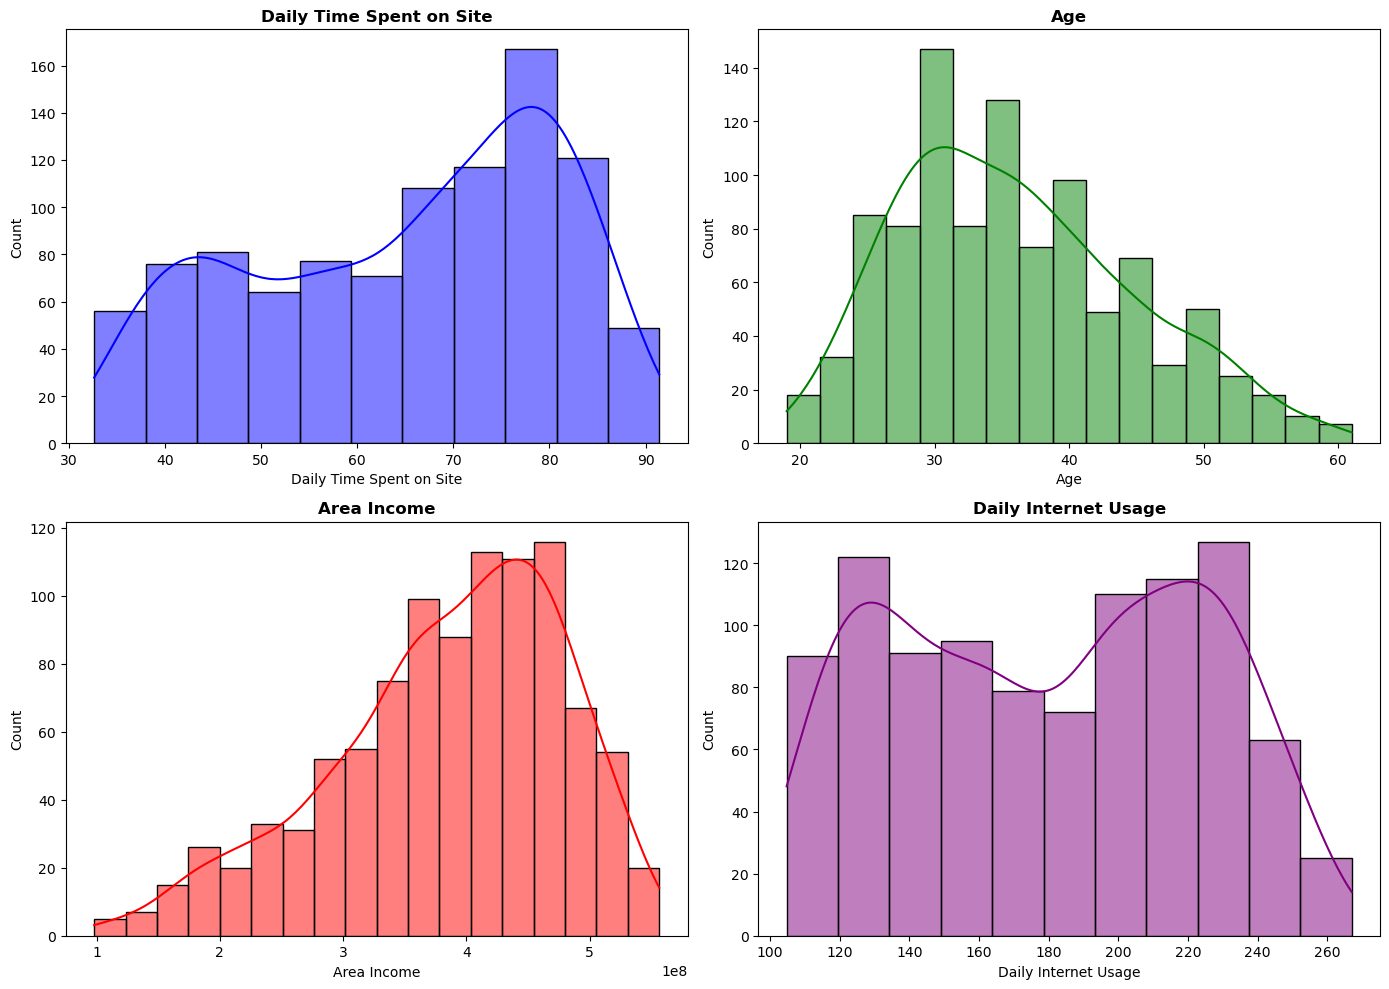

In [9]:
#visualisasi

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ----------------------------------------------------------------------------------------

sns.histplot(df['Daily Time Spent on Site'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Daily Time Spent on Site', fontweight='bold')

sns.histplot(df['Age'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Age', fontweight='bold')

sns.histplot(df['Area Income'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Area Income', fontweight='bold')

sns.histplot(df['Daily Internet Usage'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Daily Internet Usage', fontweight='bold')

plt.tight_layout()
plt.show()

**Hasil Analisis:**

- Feature Daily Time Spent on Site (-0.37), Area Income (-0.64) dan Daily Internet Usage (-0.03) menunjukkan distribusi negatif skewed, karena mean < median.
- Feature Age (0.48) menunjukkan distribusi positif skewed, karena mean > median.

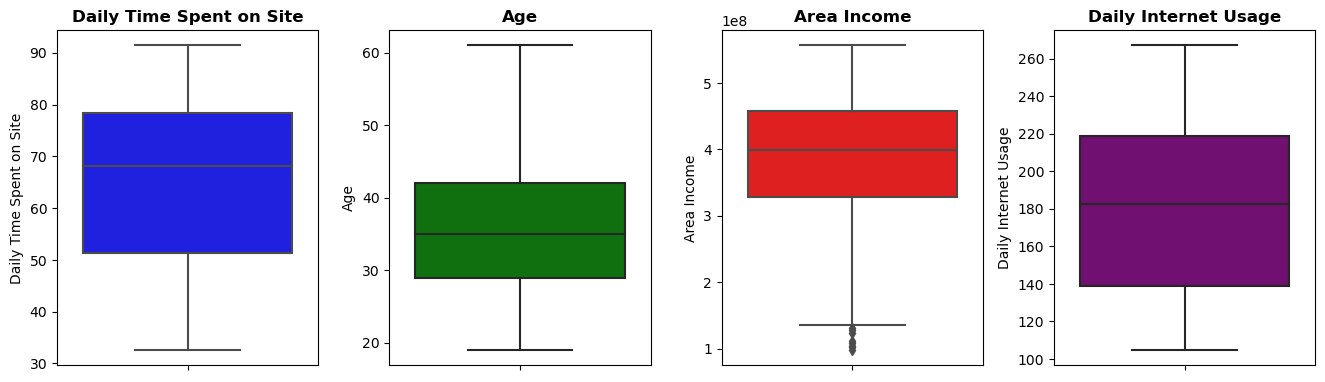

<Figure size 2000x1100 with 0 Axes>

In [10]:
#membuat plot box untuk setiap feature numerik

nums = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
colors = ['blue', 'green', 'red', 'purple']

# Konfigurasi jumlah plot per figure
num_plots_per_figure = 4
num_figures = (len(nums) // num_plots_per_figure) + 1

# Membuat plot box untuk setiap variabel numerik
for f in range(num_figures):
    plt.figure(figsize=(20, 11))
    for i in range(num_plots_per_figure):
        index = f * num_plots_per_figure + i
        if index < len(nums):
            plt.subplot(3, 6, i + 1)
            sns.boxplot(y=df[nums[index]], orient='v', color=colors[index])
            plt.title(nums[index], fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

**Hasil Analisis:**

- Untuk feature numerik rata-rata tidak memiliki oulier, kecuali pada feature Are Income

In [11]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


**Hasil Analisis:**

- Feature Male hanya dua kategori, yaitu perempuan & laki-laki. Perempuan paling sering muncul yaitu sebanyak 518 dari 997.
- Feature Timestamp tipe datanya dapat diubah dari object menjadi datetime agar lebih mudah dianalisis.
- Feature Clicked on Ad terdapat dua kategori, Yes & No dan masing-masing muncul sebanyak 500 dari 1000 (50% dan 50%).
- Feature City memiliki 30 kota unik, Surbaya paling sering muncul yaitu sebanyak 64 dari 1000.
- Feature Province memiliki 16 provinsi unik. Daerah Khusus Ibukota Jakarta paling sering muncul yaitu sebanyak 253 dari 1000.
- Feature Category memiliki 10 kategori unik. Otomotif paling sering muncul yaitu sebanyak 112 dari 1000

## Bivariate Analysis

### Numeric Features

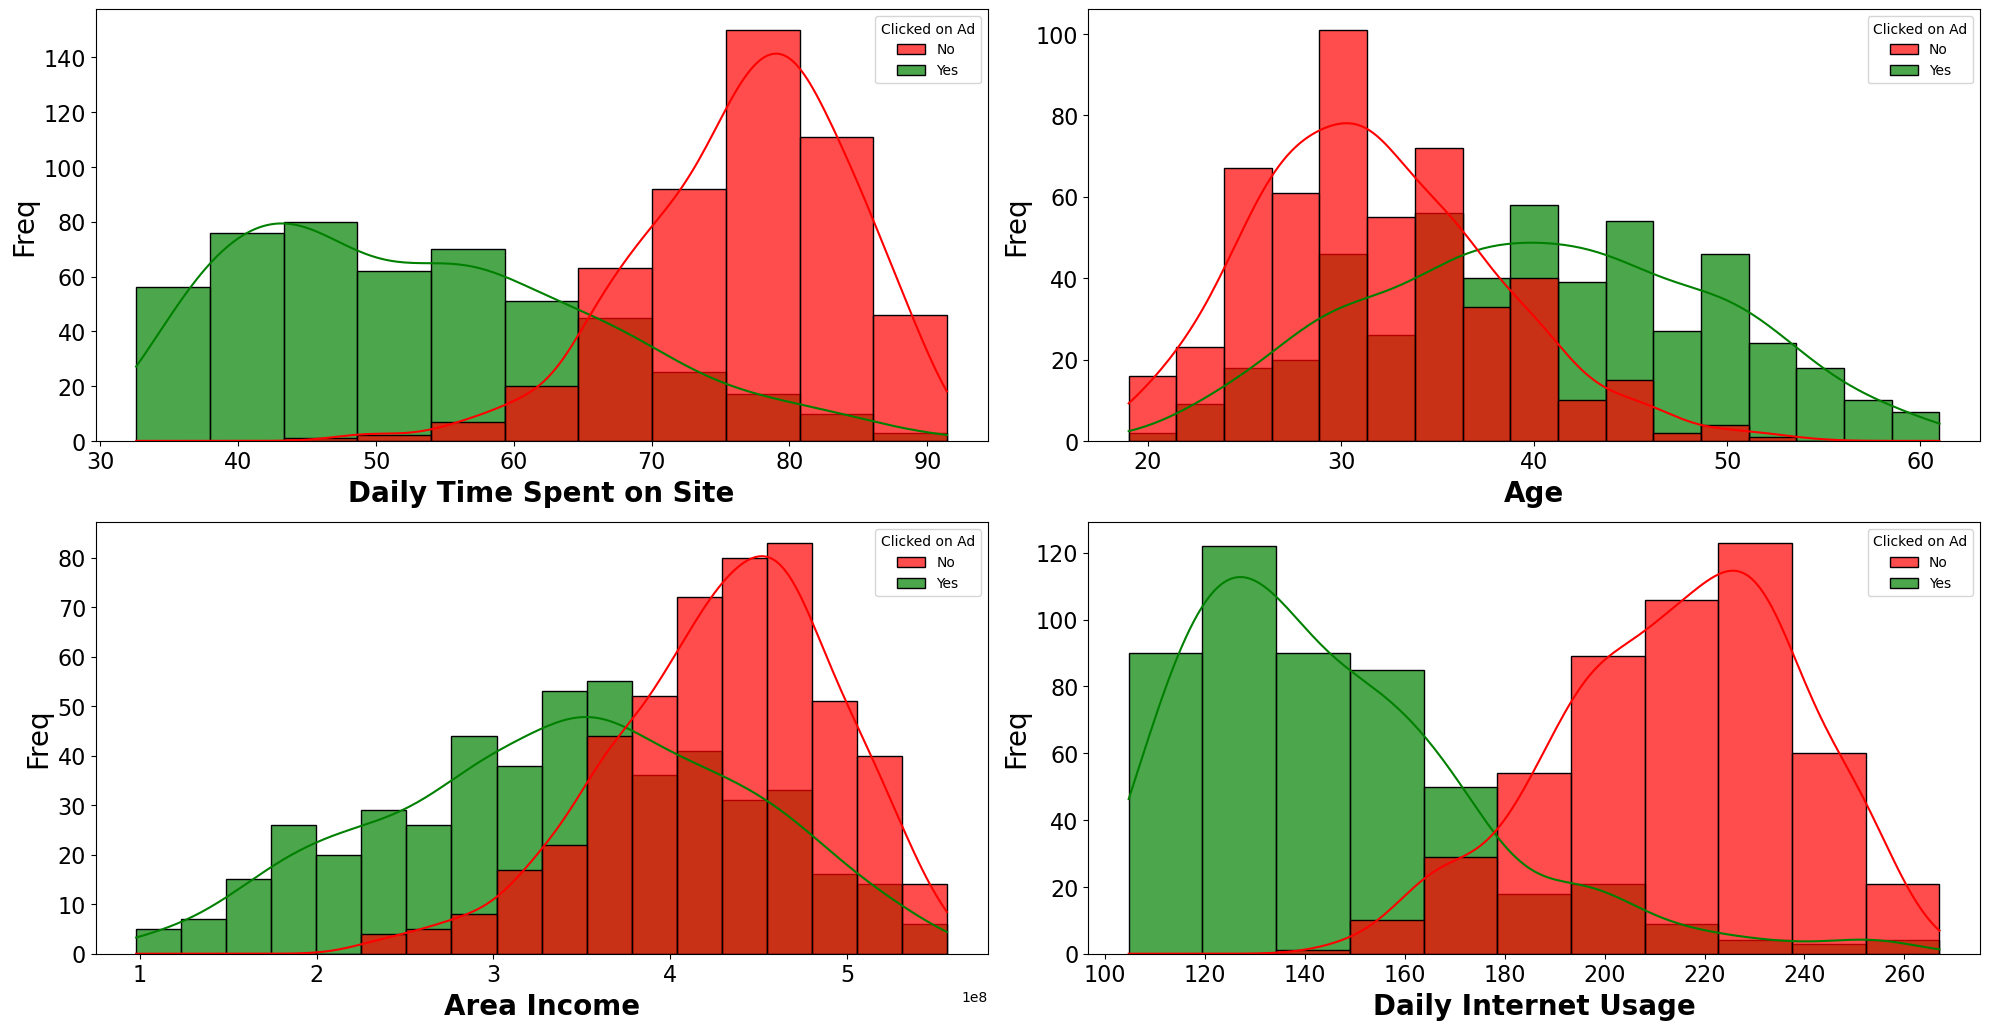

In [12]:
plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//1, 2, i+1)
    ax = sns.histplot(
        x=df[nums[i]],
        kde=True,
        hue=df["Clicked on Ad"],
        palette={"Yes": "green", "No": "red"},
        alpha=0.7
    )
    ax.set_xlabel(str(nums[i]), fontsize=20, fontweight='bold')
    ax.set_ylabel("Freq", fontsize=20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

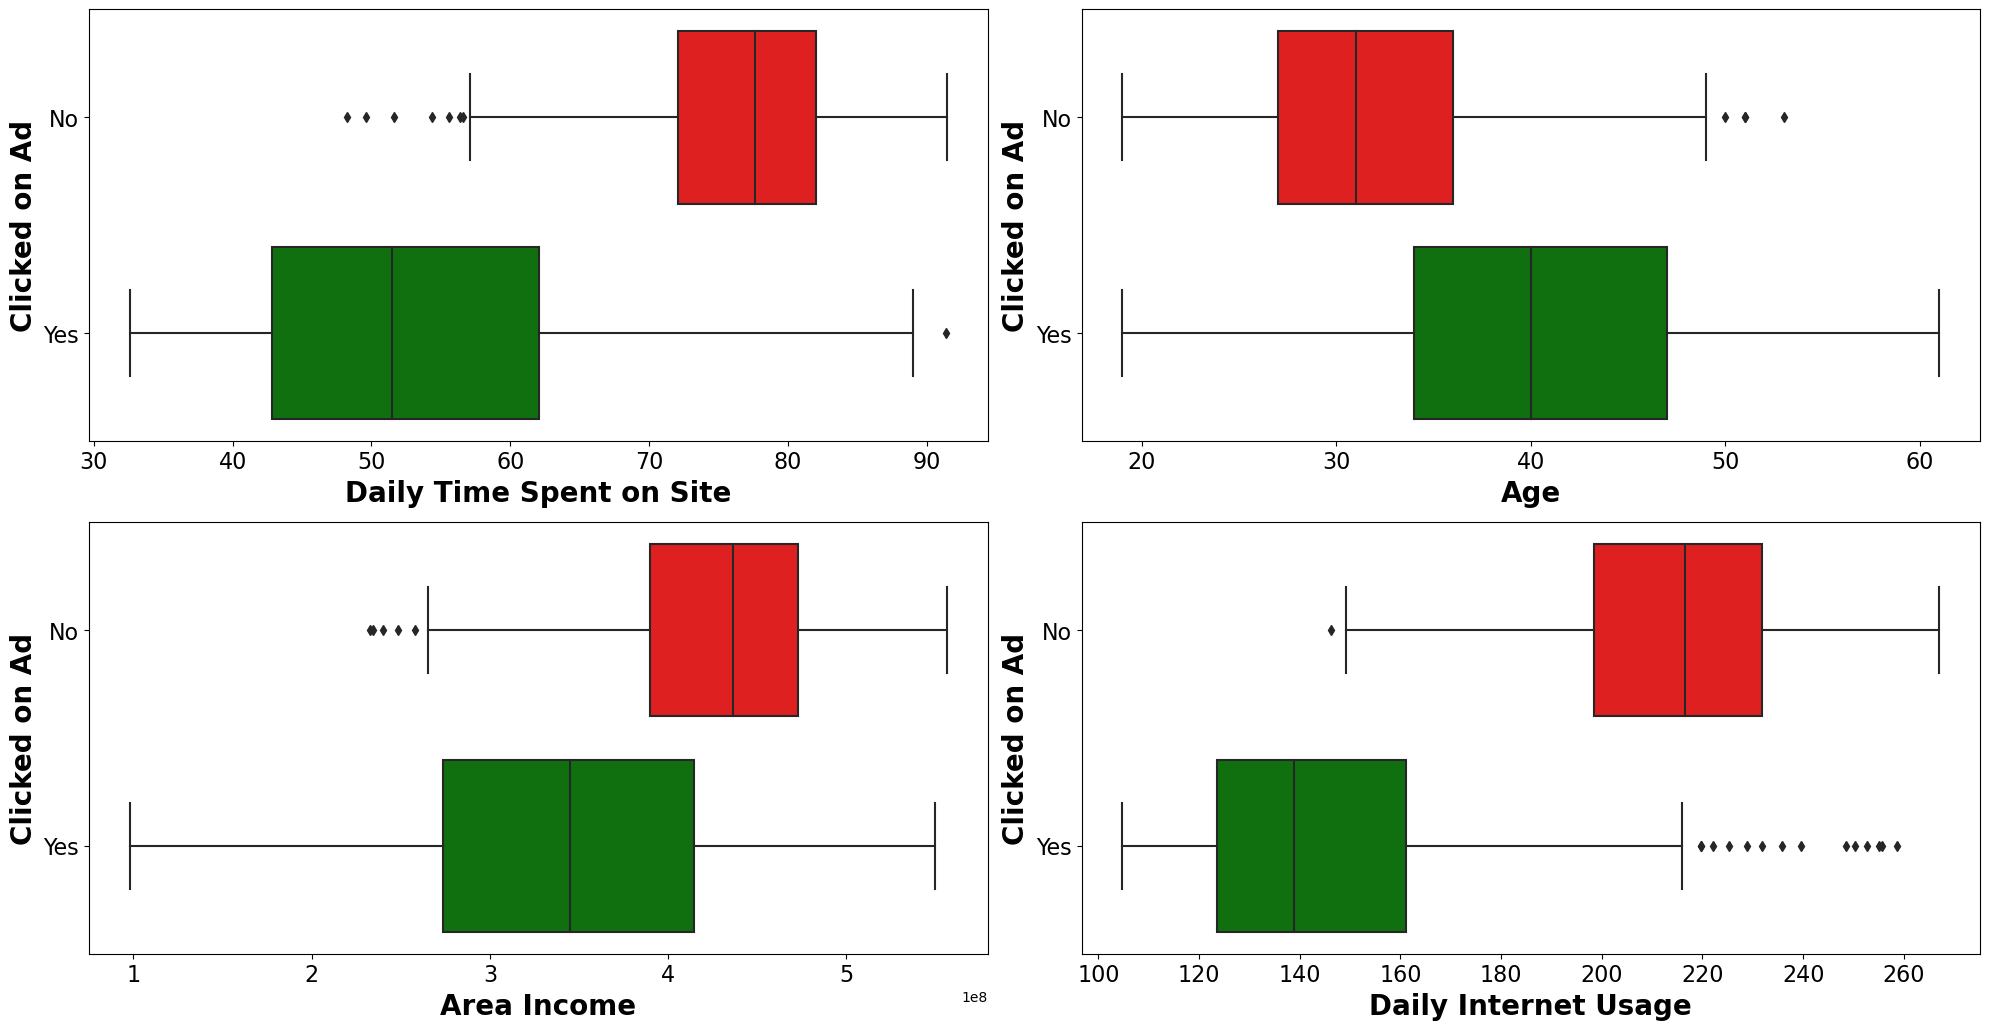

In [13]:
plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//1, 2, i+1)
    ax = sns.boxplot(
        x=df[nums[i]],
        y=df["Clicked on Ad"],
        palette={"Yes": "green", "No": "red"},
    )
    ax.set_xlabel(str(nums[i]), fontsize=20, fontweight='bold')
    ax.set_ylabel("Clicked on Ad", fontsize=20, fontweight='bold')
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

**Hasil Analisis:**

- Age dan Daily Internet Usage: Kedua fitur ini menunjukkan perbedaan distribusi yang cukup jelas antara pengguna yang mengklik iklan dan yang tidak, yang dapat menjadi indikator penting dalam model prediksi.
- Daily Time Spent on Site dan Area Income: Kedua fitur ini tidak menunjukkan perbedaan distribusi yang signifikan antara dua kelompok, sehingga mungkin kurang berpengaruh dalam model prediksi.

### Categorical Features

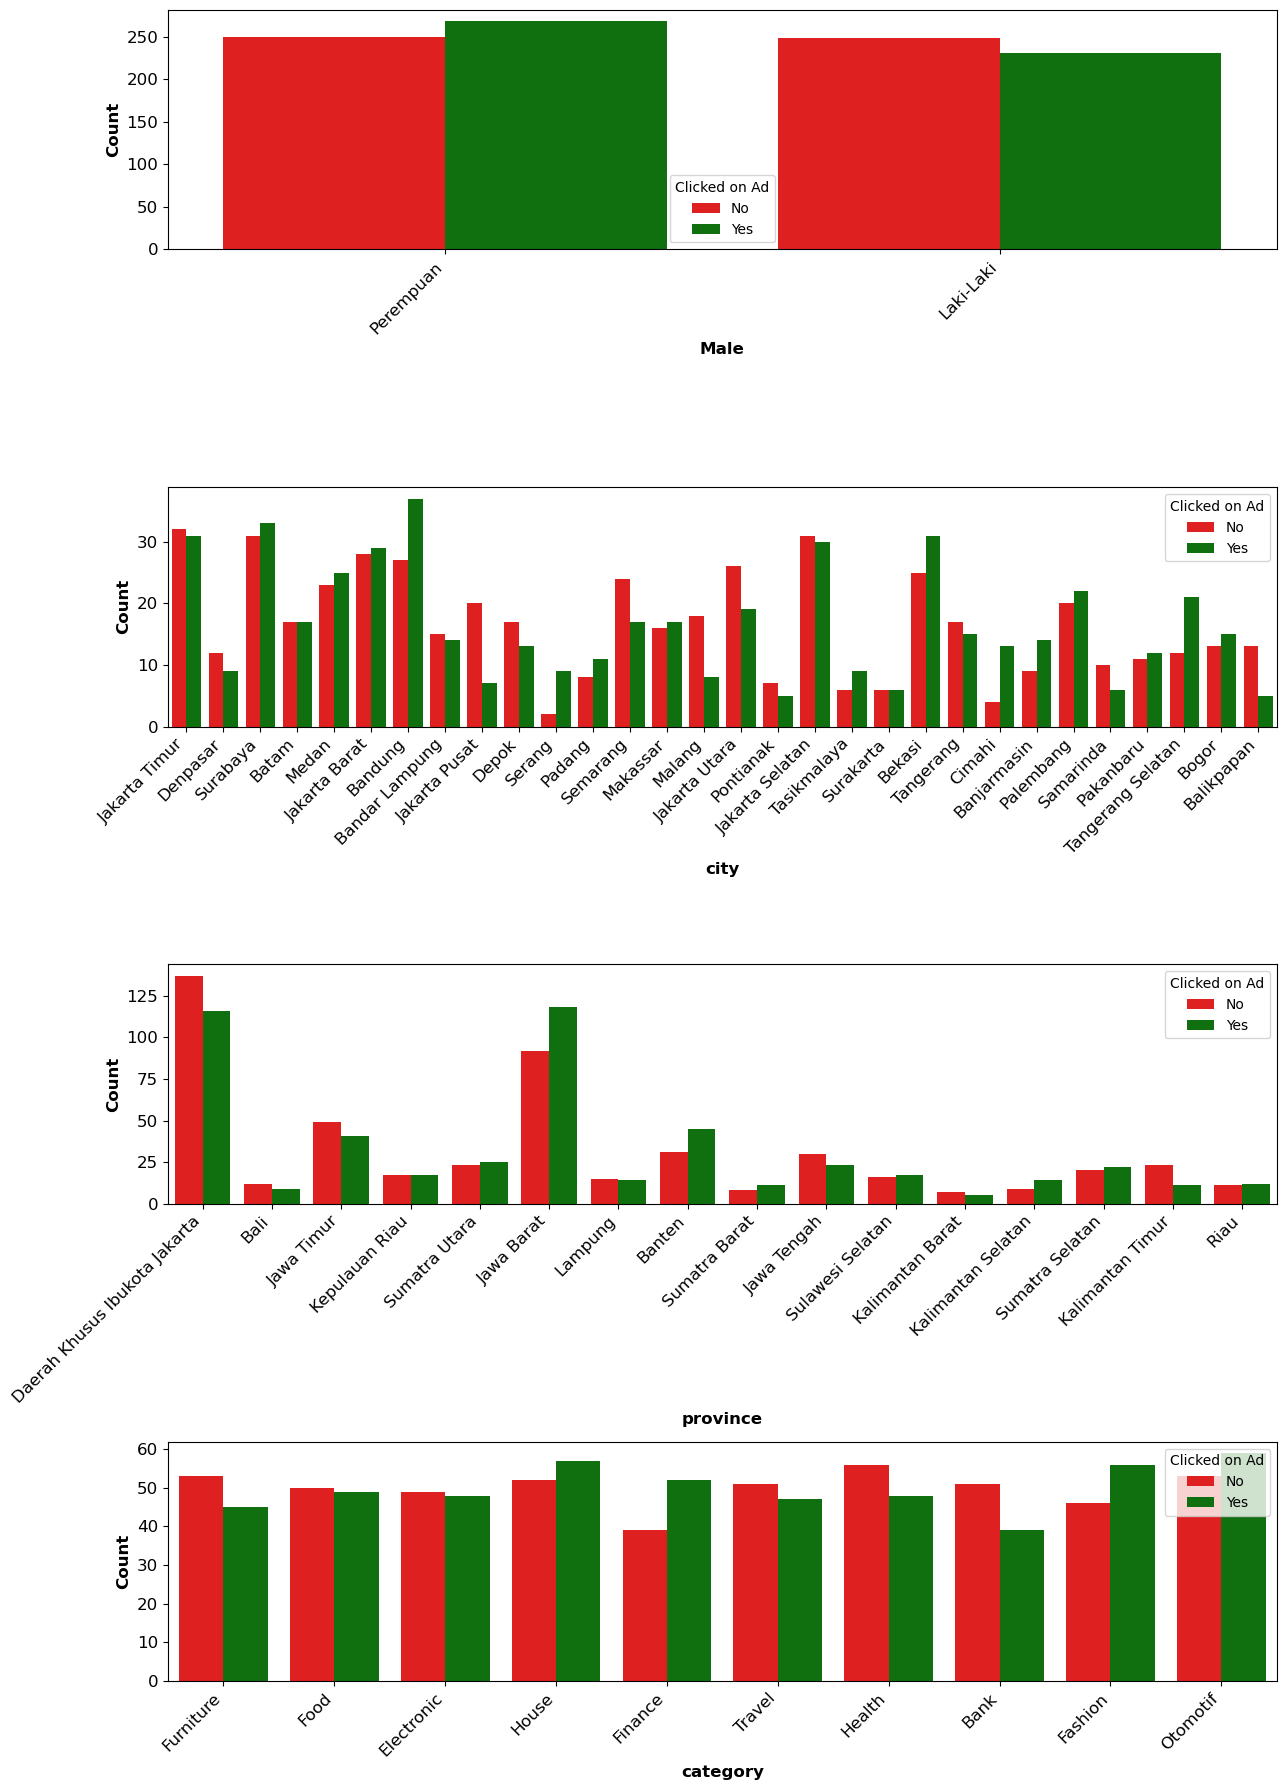

In [14]:
cats_copy = ['Male', 'city','province', 'category'] #timestamp dan clicked on ad tidak diikut serta

# Set up the figure
plt.figure(figsize=(13, 18))

# Loop through each categorical column
for i, cat in enumerate(cats_copy):
    plt.subplot(len(cats_copy), 1, i+1)
    ax = sns.countplot(
        data=df,
        x=cat,
        hue='Clicked on Ad',
        palette={"Yes": "green", "No": "red"}
    )
    ax.set_xlabel(cat, fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.tick_params(labelsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Hasil Analisis:**

- Category iklan: Kategori iklan menunjukkan perbedaan proporsi klik iklan yang cukup mencolok, sehingga dapat menjadi indikator penting dalam model prediksi.
- Male, city, dan province: Ketiga fitur ini tidak menunjukkan perbedaan proporsi klik iklan yang signifikan, sehingga mungkin kurang berpengaruh dalam model prediksi.

### Age vs Daily Time Spent on Site (minute)

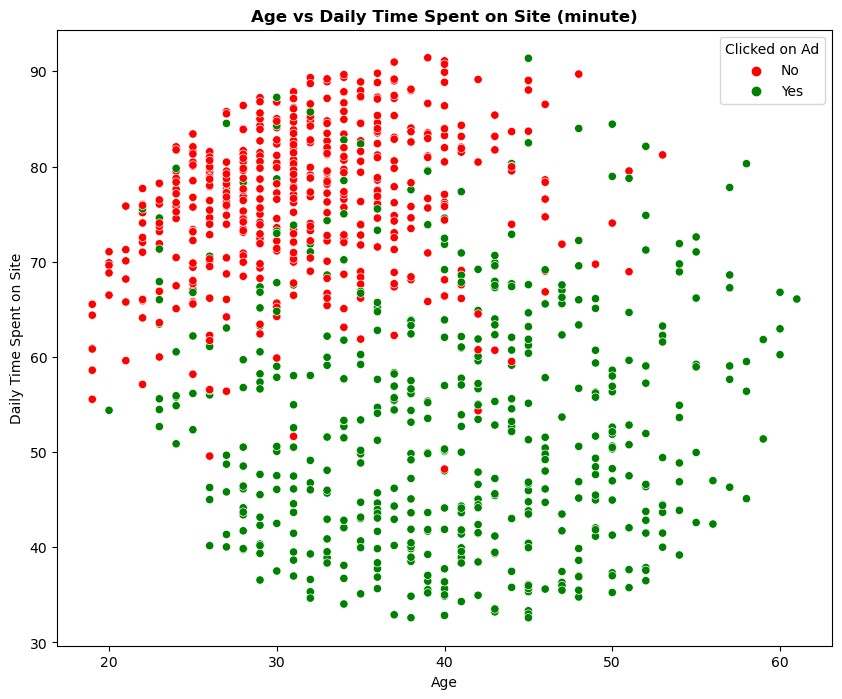

In [15]:
plt.figure(figsize=(10, 8))
plot = sns.scatterplot(
    x='Age', 
    y='Daily Time Spent on Site', 
    hue='Clicked on Ad', 
    palette={"Yes": "green", "No": "red"},
    data=df
)
plt.title('Age vs Daily Time Spent on Site (minute)', fontweight='bold')
plt.show()

**Hasil Analisis:**

- Pengguna Berusia 20-45 Tahun: Semakin lama mereka menghabiskan waktu di situs, semakin kecil kemungkinan mereka untuk mengklik iklan.
- Pengguna Berusia 25-55 Tahun: Semakin sedikit waktu yang mereka habiskan di situs, semakin besar kemungkinan mereka untuk mengklik iklan.

### Age vs Daily Internet Usage (minute)

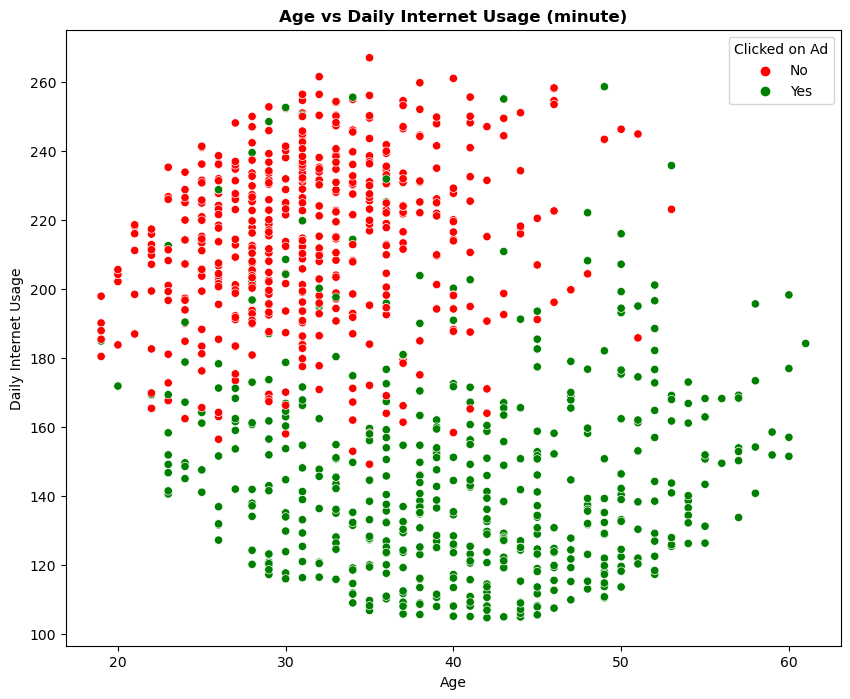

In [16]:
plt.figure(figsize=(10, 8))
plot = sns.scatterplot(
    x='Age', 
    y='Daily Internet Usage', 
    hue='Clicked on Ad', 
    palette={"Yes": "green", "No": "red"},
    data=df
)
plt.title('Age vs Daily Internet Usage (minute)', fontweight='bold')
plt.show()

**Hasil Analisis:**

- Pengguna yang Mengklik Iklan: Cenderung menghabiskan waktu di internet sekitar 110 - 160 menit dengan rentang usia 25 - 55 tahun.
- Pengguna yang Tidak Mengklik Iklan: Cenderung menghabiskan waktu di internet sekitar 180 - 260 menit dengan rentang usia 20 - 45 tahun.

### Daily Internet Usage (minute) vs Daily Time Spent on Site (minute)

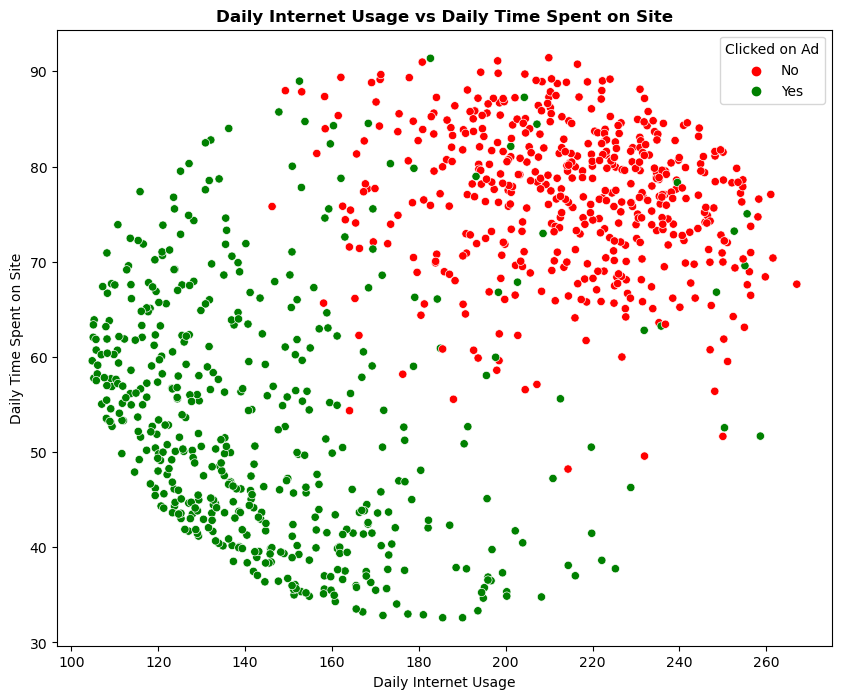

In [17]:
plt.figure(figsize=(10, 8))
plot = sns.scatterplot(
    x='Daily Internet Usage', 
    y='Daily Time Spent on Site', 
    hue='Clicked on Ad', 
    palette={"Yes": "green", "No": "red"},
    data=df
)
plt.title('Daily Internet Usage vs Daily Time Spent on Site', fontweight='bold')
plt.show()

**Hasil Analisis:**

- Pengguna yang Mengklik Iklan: Cenderung menghabiskan waktu di situs antara 35 hingga 80 menit dan menggunakan internet sekitar 100 hingga 220 menit per hari.
- Pengguna yang Tidak Mengklik Iklan: Cenderung menghabiskan lebih banyak waktu di situs (lebih dari 60 menit) dan menggunakan internet harian yang lebih tinggi (160 hingga 260 menit).

## Multivariate Analysis

### Correlation Heatmap of Numerical Features

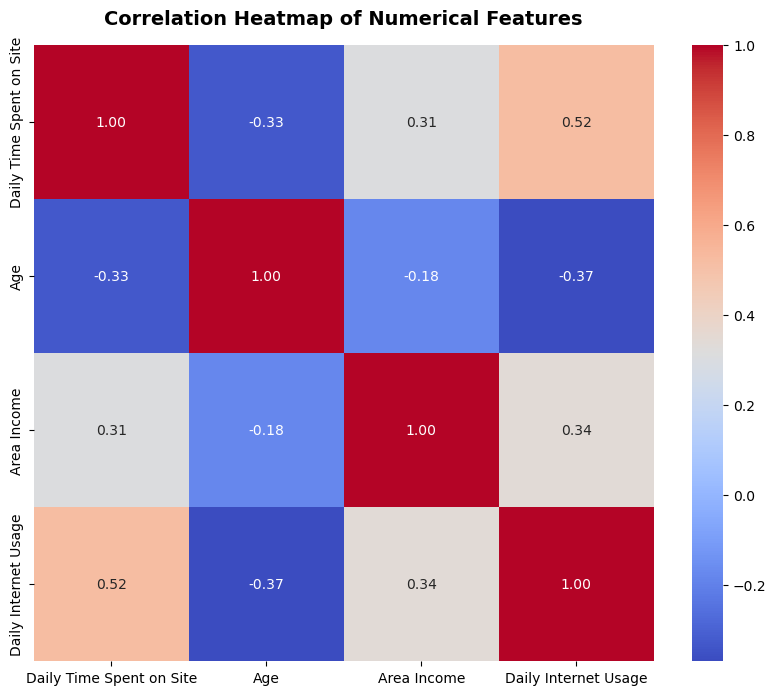

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.show()

**Hasil Analisis:**

- Pengguna yang menghabiskan banyak waktu di situs: Mereka juga cenderung memiliki penggunaan internet harian yang tinggi, terutama jika mereka berasal dari area dengan pendapatan lebih tinggi.
- Pengguna yang lebih tua: Cenderung menghabiskan lebih sedikit waktu di situs dan menggunakan internet lebih sedikit.
- Area Income: Memiliki korelasi positif dengan Daily Time Usage dan Daily Spent on Site, meskipun korelasinya tidak terlalu kuat.

### Numerical Features Correlation with Target (Clicked on Ad)

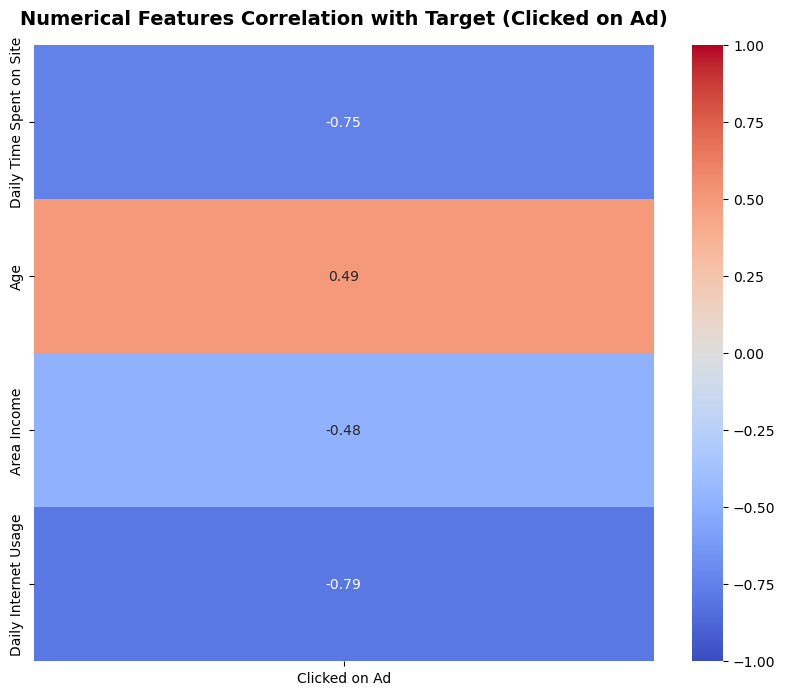

In [19]:
#mengubah target menjadi numerik
df['Clicked on Ad'] = df['Clicked on Ad'].apply(lambda x: 1 if x == 'Yes' else 0)

#menghitung korelasi antara fitur numerik dan target
correlations = df[nums + ['Clicked on Ad']].corr()

#mengambil korelasi dengan target saja
correlations_with_target = correlations[['Clicked on Ad']].drop('Clicked on Ad')

#membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numerical Features Correlation with Target (Clicked on Ad)', fontsize=14, fontweight='bold', pad=15)
plt.show()

**Hasil Analisis:**

- Daily Time Spent on Site dan Daily Internet Usage: Pengguna cenderung kurang mengklik iklan. Ini mengindikasikan bahwa durasi tinggi di situs atau internet tidak selalu berhubungan dengan tingkat klik iklan yang lebih tinggi.
- Pengguna yang Lebih Tua: Mereka cenderung lebih mungkin mengklik iklan, menunjukkan bahwa iklan mungkin lebih menarik bagi kelompok usia ini.
- Pengguna dari Area Income yang Lebih Tinggi: Mereka cenderung kurang mengklik iklan, mungkin karena preferensi atau kebiasaan online yang berbeda.

### Categorical Features Correlation

In [20]:
#Fungsi untuk menghitung Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

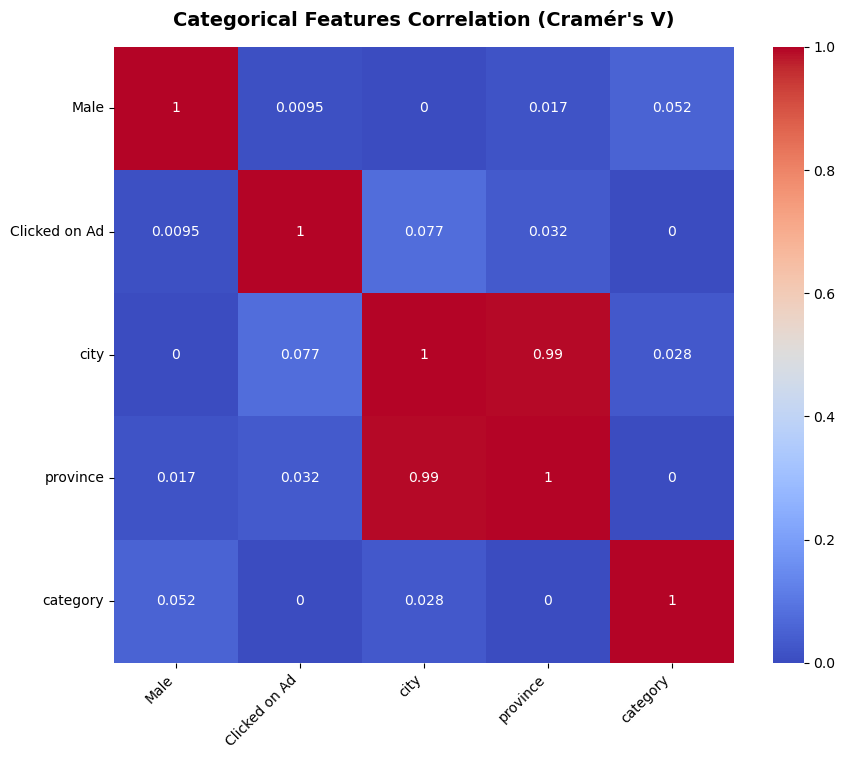

In [21]:
#feature
cats_copyy = ['Male', 'Clicked on Ad', 'city', 'province', 'category']

#menghitung matriks korelasi Cramér's V
cramers_v_matrix = pd.DataFrame(index=cats_copyy, columns=cats_copyy)

for col1 in cats_copyy:
    for col2 in cats_copyy:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

#mengubah tipe data matriks ke float
cramers_v_matrix = cramers_v_matrix.astype(float)

#visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, annot_kws={"size": 10})
plt.title("Categorical Features Correlation (Cramér's V)", fontsize=14, fontweight='bold', pad=15)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.show()

**Hasil Analisis:**

- Male: Hampir tidak memiliki pengaruh pada apakah pengguna mengklik iklan, dan juga tidak berkorelasi dengan kota, provinsi, atau kategori produk.
- Clicked on Ad: Hampir tidak berkorelasi dengan kota, provinsi, atau kategori produk.
- City dan Province: Sangat berkorelasi satu sama lain, yang sesuai dengan harapan karena kota berada dalam provinsi.
- Category: Tidak berkorelasi dengan fitur lainnya, menunjukkan bahwa kategori produk berdiri sendiri dan tidak dipengaruhi oleh variabel lain seperti gender, kota, atau provinsi.

# TASK 2: Data Cleaning & Preprocessing

In [22]:
df1 = df.copy()

## Handling Missing values

In [23]:
#imputasi numerical features
df1['Area Income'].fillna(df1['Area Income'].median(), inplace=True)
df1['Daily Time Spent on Site'].fillna(df1['Daily Time Spent on Site'].mean(), inplace=True)
df1['Daily Internet Usage'].fillna(df1['Daily Internet Usage'].mean(), inplace=True)

#imputasi categorical features
df1['Male'].fillna(df1['Male'].mode()[0], inplace=True)

#checking result
print(f'Total null values pada dataset: {df1.isna().sum().sum()}')

Total null values pada dataset: 0


Imputasi:
- Median digunakan untuk fitur Area Income karena lebih stabil terhadap nilai-nilai yang sangat ekstrem.
- Mean digunakan untuk fitur Daily Time Spent on Site dan Daily Internet Usage karena rata-rata adalah representasi yang baik untuk data yang biasanya normal.
- Mode digunakan Untuk fitur Male, menggunakan nilai yang paling sering muncul karena adalah cara terbaik untuk data kategorikal.

## Feature Engineering

In [24]:
#mengubah tipe data Timestamp menjadi datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['Year'] = df1.Timestamp.dt.year

df1['Month'] = df1.Timestamp.dt.month

df1['Week'] = df1.Timestamp.dt.isocalendar().week

df1['Day'] = df1.Timestamp.dt.dayofweek

df1.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
739,739,82.37,30,445650240.0,179.86362,Perempuan,2016-06-29 04:23:00,0,Palembang,Sumatra Selatan,House,2016,6,26,2
358,358,51.38,59,296537430.0,158.56000,Perempuan,2016-06-17 17:11:00,1,Palembang,Sumatra Selatan,House,2016,6,24,4
684,684,42.06,34,302688330.0,131.55000,Perempuan,2016-06-29 02:48:00,1,Palembang,Sumatra Selatan,House,2016,6,26,2
782,782,80.46,29,398365100.0,230.78000,Perempuan,2016-06-04 09:13:00,0,Medan,Sumatra Utara,Otomotif,2016,6,22,5
233,233,78.32,28,345163980.0,239.52000,Perempuan,2016-06-26 11:52:00,1,Semarang,Jawa Tengah,Bank,2016,6,25,6


In [25]:
#mengubah nama male menjadi gender

df1.rename(columns = {'Male':'Gender'}, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   int64         
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Year                      1000 non-null   int32         
 12  Month                

In [26]:
#feature

nums = [col for col in df1.columns if (df1[col].dtype == 'int64' or df1[col].dtype == 'float64') and col != 'Unnamed: 0' and col != 'Year' and col != 'Month' and col != 'Week' and col != 'Day']
cats = [col for col in df1.columns if df1[col].dtype == 'object']

## Handling Outliers

In [27]:
#menggunakan metode IQR
print(f'Sebelum handle otliers: {len(df1)}')

q1 = df1['Area Income'].quantile(0.25)
q3 = df1['Area Income'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
df1 = df1[(df1['Area Income']>=low)&(df1['Area Income']<=upper)]

print(f'Sesudah handle outliers: {len(df1)}')

Sebelum handle otliers: 1000
Sesudah handle outliers: 991


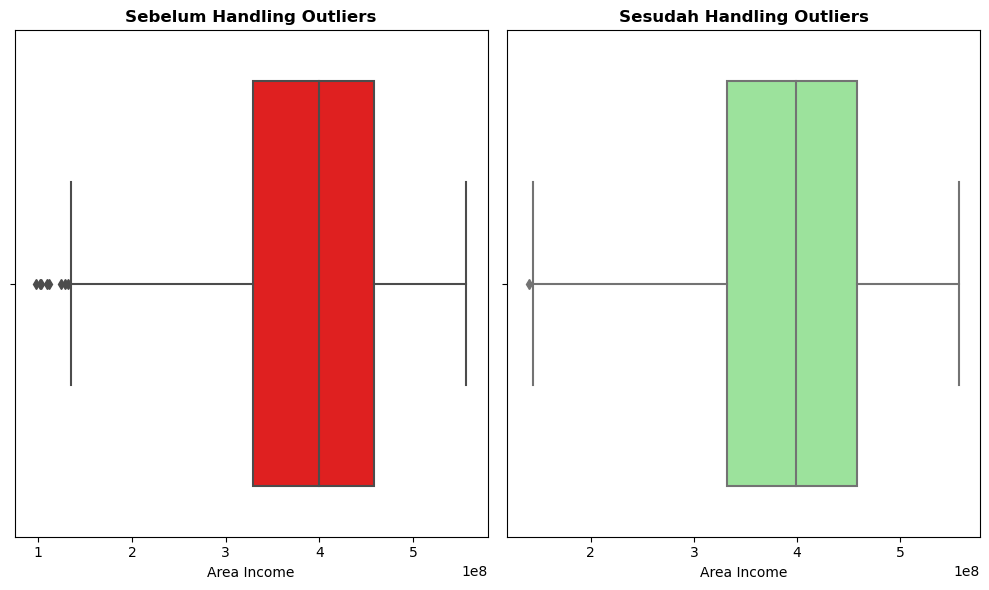

In [28]:
#visualisasi sebelum handling outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Area Income', data=df, color='red')
plt.title('Sebelum Handling Outliers', fontweight='bold')

# Visualisasi sesudah handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='Area Income', data=df1, color='lightgreen')
plt.title('Sesudah Handling Outliers', fontweight='bold')

plt.tight_layout()
plt.show()

**Hasil Analisis:**

- Sebelum Handling Outliers: Dataset memiliki sejumlah outliers signifikan yang dapat mengganggu analisis dan memperkenalkan bias pada model machine learning.
- Sesudah Handling Outliers: Dataset lebih bersih dan fokus pada nilai-nilai umum, sehingga analisis lebih akurat dan model lebih andal.

## Feature Encoding

Sebelumnya feature Clicked on Ad sudah memiliki label.

In [29]:
df_enc = df1.copy()
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                991 non-null    int64         
 1   Daily Time Spent on Site  991 non-null    float64       
 2   Age                       991 non-null    int64         
 3   Area Income               991 non-null    float64       
 4   Daily Internet Usage      991 non-null    float64       
 5   Gender                    991 non-null    object        
 6   Timestamp                 991 non-null    datetime64[ns]
 7   Clicked on Ad             991 non-null    int64         
 8   city                      991 non-null    object        
 9   province                  991 non-null    object        
 10  category                  991 non-null    object        
 11  Year                      991 non-null    int32         
 12  Month                     9

### Label Encoding

In [30]:
df_enc['Gender'].value_counts()

Gender
Perempuan    518
Laki-Laki    473
Name: count, dtype: int64

In [31]:
#memberi label

df_enc['Gender'] = np.where(df_enc['Gender'] == 'Laki-Laki', 1, 0)
df_enc['Gender'].value_counts()

Gender
0    518
1    473
Name: count, dtype: int64

In [32]:
df_enc['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    491
Name: count, dtype: int64

### One-Hot Encoding

In [33]:
print(f"Nilai unik dari category: {df_enc['category'].nunique()}")
print(f"Nilai unik dari city: {df_enc['city'].nunique()}")
print(f"Nilai unik dari province: {df_enc['province'].nunique()}")

Nilai unik dari category: 10
Nilai unik dari city: 30
Nilai unik dari province: 16


In [34]:
pd.set_option('display.max_columns', None)

In [35]:
#one-hot encoding

df_enc = pd.get_dummies(df_enc, columns=['category'])
df_enc.head(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,Year,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,2016,3,12,6,False,False,False,False,False,True,False,False,False,False
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,2016,4,14,0,False,False,False,False,True,False,False,False,False,False
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,2016,3,10,6,False,True,False,False,False,False,False,False,False,False


In [36]:
#mengubah nilai True/False menjadi 0/1
for col in df_enc.columns:
    if 'category_' in col:
        df_enc[col] = df_enc[col].astype('uint8')
        
#mengubah kolom yang berisi UInt32 dan int32 menjadi int64
for col in df_enc.select_dtypes(include=['UInt32', 'int32']).columns:
    df_enc[col] = df_enc[col].astype('int64')
print(df_enc.head(5))

   Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0           0                     68.95   35  432837300.0   
1           1                     80.23   31  479092950.0   
2           2                     69.47   26  418501580.0   
3           3                     74.15   29  383643260.0   
4           4                     68.37   35  517229930.0   

   Daily Internet Usage  Gender           Timestamp  Clicked on Ad  \
0                256.09       0 2016-03-27 00:53:00              0   
1                193.77       1 2016-04-04 01:39:00              0   
2                236.50       0 2016-03-13 20:35:00              0   
3                245.89       1 2016-01-10 02:31:00              0   
4                225.58       0 2016-06-03 03:36:00              0   

            city                       province  Year  Month  Week  Day  \
0  Jakarta Timur  Daerah Khusus Ibukota Jakarta  2016      3    12    6   
1       Denpasar                           Bali  2016      4  

In [37]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                991 non-null    int64         
 1   Daily Time Spent on Site  991 non-null    float64       
 2   Age                       991 non-null    int64         
 3   Area Income               991 non-null    float64       
 4   Daily Internet Usage      991 non-null    float64       
 5   Gender                    991 non-null    int64         
 6   Timestamp                 991 non-null    datetime64[ns]
 7   Clicked on Ad             991 non-null    int64         
 8   city                      991 non-null    object        
 9   province                  991 non-null    object        
 10  Year                      991 non-null    int64         
 11  Month                     991 non-null    int64         
 12  Week                      9

## Feature Selection

In [38]:
df_clean = df_enc.select_dtypes(include=['float64', 'int64', 'uint8'])

#memeriksa apakah kolom 'Unnamed: 0' dan 'Year' ada sebelum menghapusnya
columns_to_drop = ['Unnamed: 0', 'Year']
columns_to_drop_existing = [col for col in columns_to_drop if col in df_clean.columns]

#menghapus kolom yang ada
df_clean = df_clean.drop(columns=columns_to_drop_existing)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Gender                    991 non-null    int64  
 5   Clicked on Ad             991 non-null    int64  
 6   Month                     991 non-null    int64  
 7   Week                      991 non-null    int64  
 8   Day                       991 non-null    int64  
 9   category_Bank             991 non-null    uint8  
 10  category_Electronic       991 non-null    uint8  
 11  category_Fashion          991 non-null    uint8  
 12  category_Finance          991 non-null    uint8  
 13  category_Food             991 non-null    uint8  
 14  category_Furnit

**Hasil Analisis:**

- Fitur yang Tidak Diperlukan: Penghapusan fitur yang tidak relevan seperti "Unnamed: 0" dan "Year" membantu menyederhanakan dataset dan mengurangi kompleksitas tanpa kehilangan informasi yang penting.
- Dataset yang bersih dengan 19 fitur memberikan struktur yang lebih terfokus dan siap untuk analisis lebih lanjut. Hal ini juga membantu menghindari kemungkinan masalah yang disebabkan oleh fitur yang tidak relevan atau berlebihan dalam model machine learning.

## Split Dataset

In [39]:
#memisahkan fitur dan target
X = df_clean.drop(columns='Clicked on Ad')
y = df_clean['Clicked on Ad'].values
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

In [40]:
from sklearn.model_selection import train_test_split

#membagi data menjadi train dan test set (Split to train 70% and test 30%)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

print(f'Train set size: {X1_train.shape[0]}')
print(f'Test set size: {X1_test.shape[0]}')

Train set size: 693
Test set size: 298


- Dengan membagi dataset menjadi 70% untuk pelatihan dan 30% untuk pengujian, kita memastikan bahwa model machine learning dapat dilatih secara efektif dan diuji dengan data yang tidak terlihat sebelumnya. Hal ini membantu dalam mengevaluasi performa model secara realistis.
- Ukuran set pelatihan yang cukup besar (693 entri) memungkinkan model untuk belajar dengan baik dari data, sementara ukuran set pengujian yang cukup besar (298 entri) memberikan estimasi yang andal tentang bagaimana model akan performa pada data baru.

## Feature Scalling

In [41]:
#menentukan kolom numerik yang akan diskalakan
nums = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]

In [42]:
from sklearn.preprocessing import StandardScaler

#melakukan scaling pada kolom numerik
ss = StandardScaler()
X2_train_scaled = X2_train.copy()
X2_test_scaled = X2_test.copy()

X2_train_scaled[nums] = ss.fit_transform(X2_train[nums])
X2_test_scaled[nums] = ss.transform(X2_test[nums])

#menampilkan data yang telah diskalakan
print("\nX2_train_scaled:")
print(X2_train_scaled.head())

print("\nX2_test_scaled:")
print(X2_test_scaled.head())


X2_train_scaled:
     Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
945                  1.590504 -0.004025     0.181124              0.427843   
575                 -1.003102  2.004417    -0.140318             -1.024737   
933                 -1.771554 -0.227186    -0.641011             -0.675598   
405                  1.069756  0.553875     0.037482              1.564764   
529                  1.563263 -0.227186    -0.949677             -0.396834   

     Gender  Month  Week  Day  category_Bank  category_Electronic  \
945       0      2     5    1              0                    0   
575       0      1     1    5              0                    0   
933       1      6    26    0              0                    0   
405       0      1     4    2              0                    0   
529       1      4    15    5              0                    0   

     category_Fashion  category_Finance  category_Food  category_Furniture  \
945                 

In [43]:
X2_train_scaled[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,693.0,-4.844610e-16,1.000722,-2.033195,-0.852325,0.194239,0.854361,1.689966
Age,693.0,3.486068e-16,1.000722,-1.900887,-0.785086,-0.115605,0.665455,2.673898
Area Income,693.0,1.307276e-16,1.000722,-2.670087,-0.641011,0.146534,0.790409,1.900536
Daily Internet Usage,693.0,-4.114073e-16,1.000722,-1.700695,-0.895148,0.009324,0.881746,1.869036


**Hasil analisis:**

- Semua fitur memiliki mean yang sangat mendekati 0, yang menunjukkan bahwa scaling telah berhasil mengubah rata-rata fitur ke pusat distribusi yang diinginkan (yaitu 0). Hal ini adalah indikator bahwa fitur-fitur telah distandarisasi dengan benar.
- Standard Deviation untuk semua fitur adalah sekitar 1, seperti yang diharapkan setelah penerapan StandardScaler. Hal ini menunjukkan bahwa rentang nilai untuk setiap fitur telah disesuaikan untuk memiliki deviasi standar yang seragam.
- Rentang nilai setiap fitur menunjukkan variasi data setelah scaling. Meskipun rentang nilai (min hingga max) bervariasi, fitur-fitur tersebut telah distandarisasi dengan mean 0 dan std 1, yang merupakan tujuan dari scaling.
- Data yang telah discaling memudahkan algoritma machine learning dalam memproses data secara efisien. Hal ini mengurangi risiko model terdistorsi oleh fitur dengan skala yang berbeda dan meningkatkan akurasi serta kestabilan model.
- Dengan semua fitur berada pada skala yang seragam, model dapat memberikan perhatian yang lebih seimbang terhadap setiap fitur, yang berpotensi meningkatkan kinerja dan keakuratan dalam prediksi.

# TASK 3: Data Modeling

## Sebelum Standardization

In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import time

In [45]:
def eval_classification1(model):
    y_pred = model.predict(X1_test)
    y_pred_train = model.predict(X1_train)
    y_pred_proba = model.predict_proba(X1_test)
    y_pred_proba_train = model.predict_proba(X1_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y1_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y1_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y1_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y1_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y1_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y1_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y1_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y1_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))

In [46]:
def grid_pipe1(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1={}
    fit_time1 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X1_train, y1_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))
        #Append model
        fitted_models1[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models1, fit_time1

In [47]:
def confusion1(model):
    y_pred_proba = model.predict_proba(X1_test)
    y_predict = model.predict(X1_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y1_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y1_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y1_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y1_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y1_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y1_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(random_state=123)
logreg1.fit(X1_train, y1_train)

eval_classification1(logreg1)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.89
Precision (Test Set): 0.95
Recall (Test Set): 0.89
Recall (Train Set): 0.86
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.95
Accuracy (crossval train): 0.780507149749027
Accuracy (crossval test): 0.7770062211100685


Accuracy: 92.28%
Precision: 94.81%
Recall: 88.89%
F1_Score: 91.76%
ROC_AUC: 96.16%


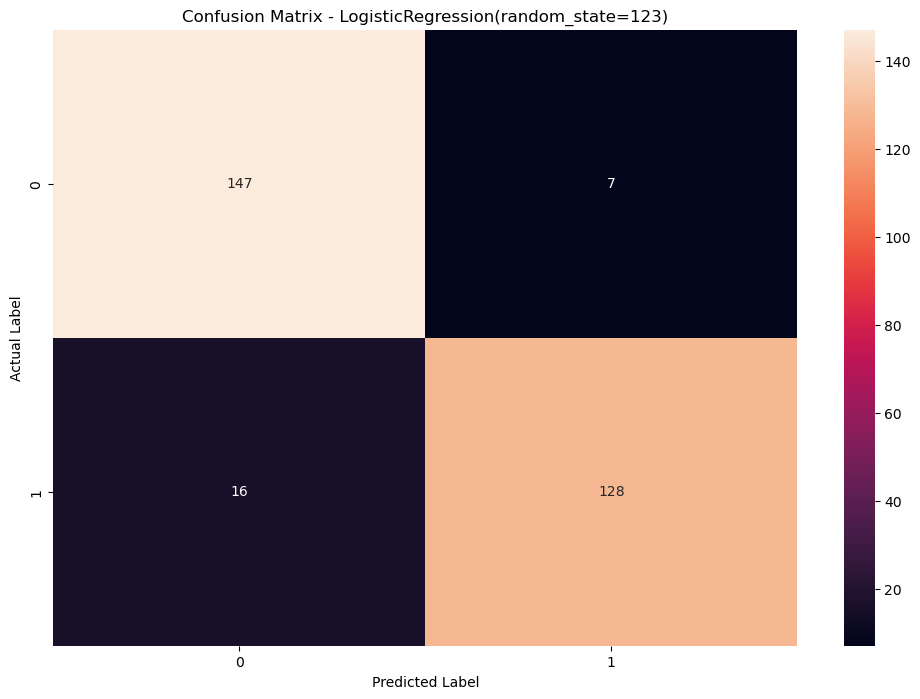

In [49]:
confusion1(logreg1)

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

dec_tree1 = DecisionTreeClassifier(random_state=123)
dec_tree1.fit(X1_train, y1_train)

eval_classification1(dec_tree1)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.93
Recall (Test Set): 0.94
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9292948250095576


Accuracy: 93.96%
Precision: 93.15%
Recall: 94.44%
F1_Score: 93.79%
ROC_AUC: 93.98%


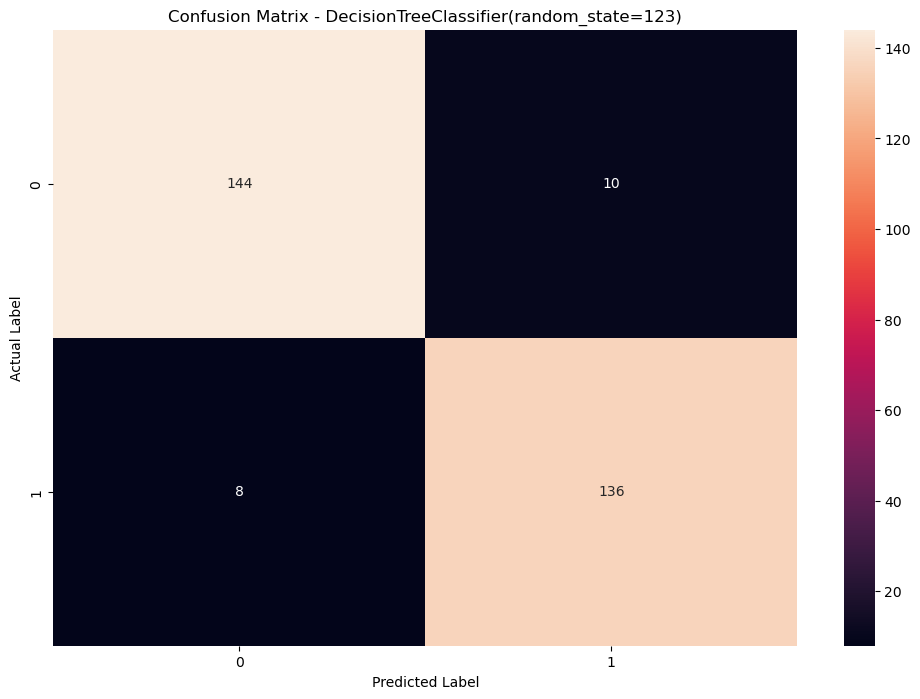

In [51]:
confusion1(dec_tree1)

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rforest1 = RandomForestClassifier(random_state=123)
rforest1.fit(X1_train, y1_train)

eval_classification1(rforest1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9571890313835889


Accuracy: 96.98%
Precision: 97.20%
Recall: 96.53%
F1_Score: 96.86%
ROC_AUC: 99.06%


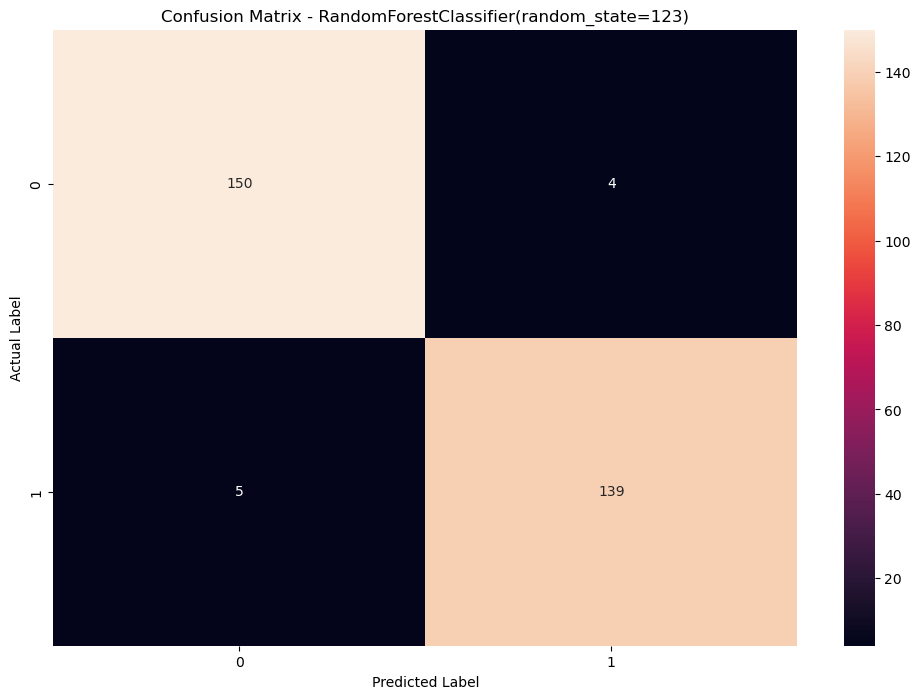

In [53]:
confusion1(rforest1)

### K-Nearest Neighbours

In [54]:
from sklearn.neighbors import KNeighborsClassifier

k_nn1 = KNeighborsClassifier()
k_nn1.fit(X1_train, y1_train)

eval_classification1(k_nn1)

Accuracy (Test Set): 0.66
Accuracy (Train Set): 0.76
Precision (Test Set): 0.68
Recall (Test Set): 0.55
Recall (Train Set): 0.73
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.68
roc_auc (train-proba): 0.86
Accuracy (crossval train): 0.7652696740061361
Accuracy (crossval test): 0.6642755360928647


Accuracy: 65.77%
Precision: 68.10%
Recall: 54.86%
F1_Score: 60.77%
ROC_AUC: 68.05%


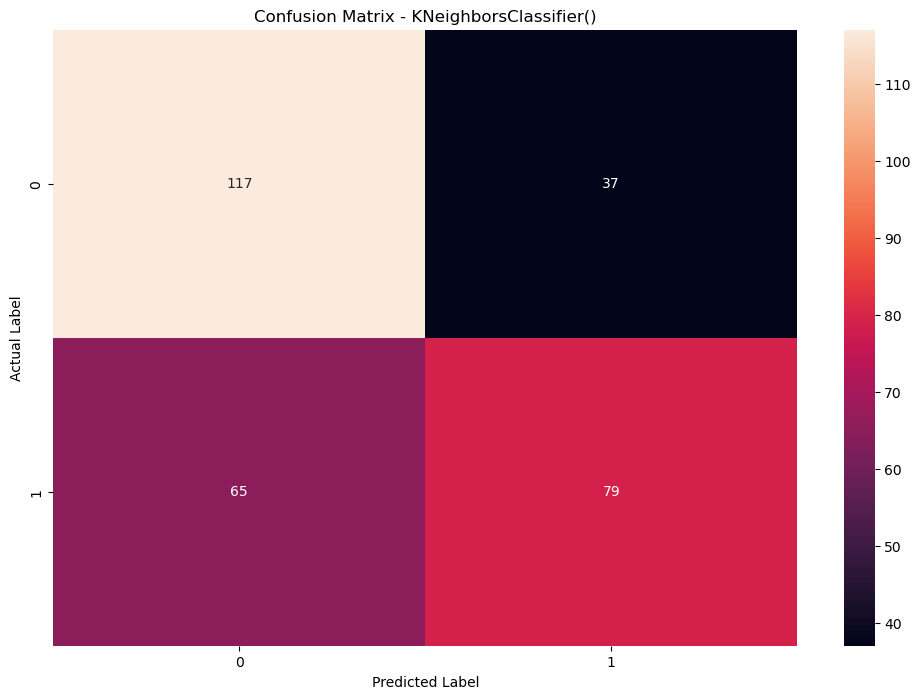

In [55]:
confusion1(k_nn1)

### Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gd_boost1 = GradientBoostingClassifier(random_state=123)
gd_boost1.fit(X1_train, y1_train)

eval_classification1(gd_boost1)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9998798798798798
Accuracy (crossval test): 0.9514197337781947


Accuracy: 97.32%
Precision: 97.22%
Recall: 97.22%
F1_Score: 97.22%
ROC_AUC: 98.99%


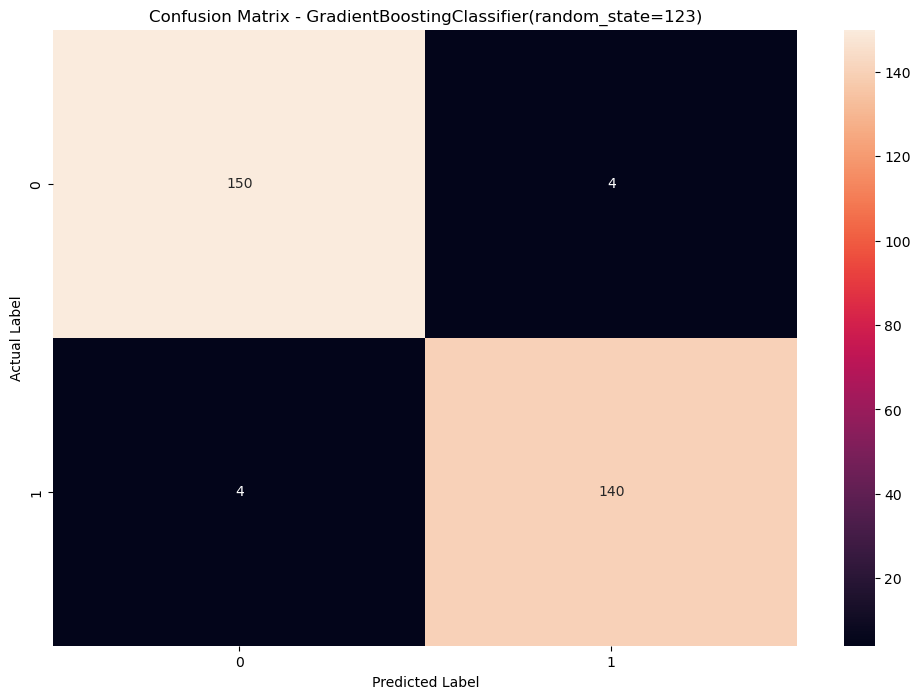

In [57]:
confusion1(gd_boost1)

### XGBoost

In [58]:
from xgboost import XGBClassifier

xg_boost1 = XGBClassifier(nthread=6, tree_method='hist', random_state=123)
xg_boost1.fit(X1_train, y1_train)

eval_classification1(xg_boost1)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Test Set): 0.96
Recall (Train Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9422965975046048


Accuracy: 95.97%
Precision: 95.83%
Recall: 95.83%
F1_Score: 95.83%
ROC_AUC: 99.08%


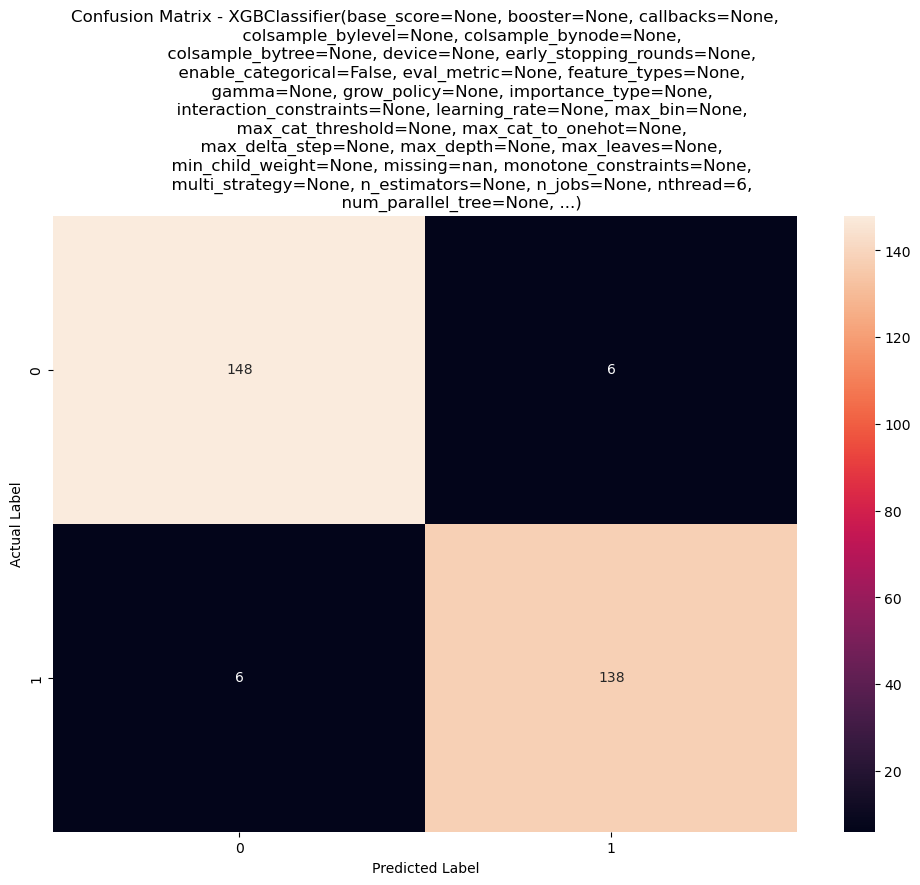

In [59]:
confusion1(xg_boost1)

## Hyperparameter Tuning

In [60]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression1': Pipeline([('clf', LogisticRegression(random_state=123))]),
            'decisiontree1':Pipeline([('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest1':Pipeline([('clf', RandomForestClassifier(random_state = 123))]),
            'knn1':Pipeline([('clf', KNeighborsClassifier())]),
            'gb1':Pipeline([('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost1': Pipeline([('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

In [61]:
#Define Hyperparameters for each pipeline
hyperparameters_lr1 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt1 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf1 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn1 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb1 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb1 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression1':hyperparameters_lr1,
                   'decisiontree1':hyperparameters_dt1,
                   'randomforest1':hyperparameters_rf1,
                   'knn1':hyperparameters_knn1,
                   'gb1':hyperparameters_gb1,
                   'xgboost1': hyperparameters_xgb1}

In [62]:
fitted_models1, fit_time1 = grid_pipe1(pipelines,hyperparameters,scoring='accuracy')

Fitting 15 folds for each of 400 candidates, totalling 6000 fits
The logisticregression1 model has been fitted.
Total Fit Time: 24.430s
Best accuracy: 0.938
Best params:
 {'clf__C': 0.002, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree1 model has been fitted.
Total Fit Time: 11.530s
Best accuracy: 0.900
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 14, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest1 model has been fitted.
Total Fit Time: 13.696s
Best accuracy: 0.946
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 120} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn1 model has been fitted.
Total Fit Time: 16.032s
Best 

## Sesudah Hyperparameter Tuning

### Logistic Regression

In [63]:
logreg1_tuned = LogisticRegression(random_state=123, C = 0.004424242424242424, penalty = 'l2', solver = 'newton-cg')
logreg1_tuned.fit(X1_train, y1_train)

eval_classification1(logreg1_tuned)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.94
Precision (Test Set): 0.97
Recall (Test Set): 0.92
Recall (Train Set): 0.91
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.98
Accuracy (crossval train): 0.9285742782493684
Accuracy (crossval test): 0.9278803044520905


Accuracy: 94.97%
Precision: 97.08%
Recall: 92.36%
F1_Score: 94.66%
ROC_AUC: 98.25%


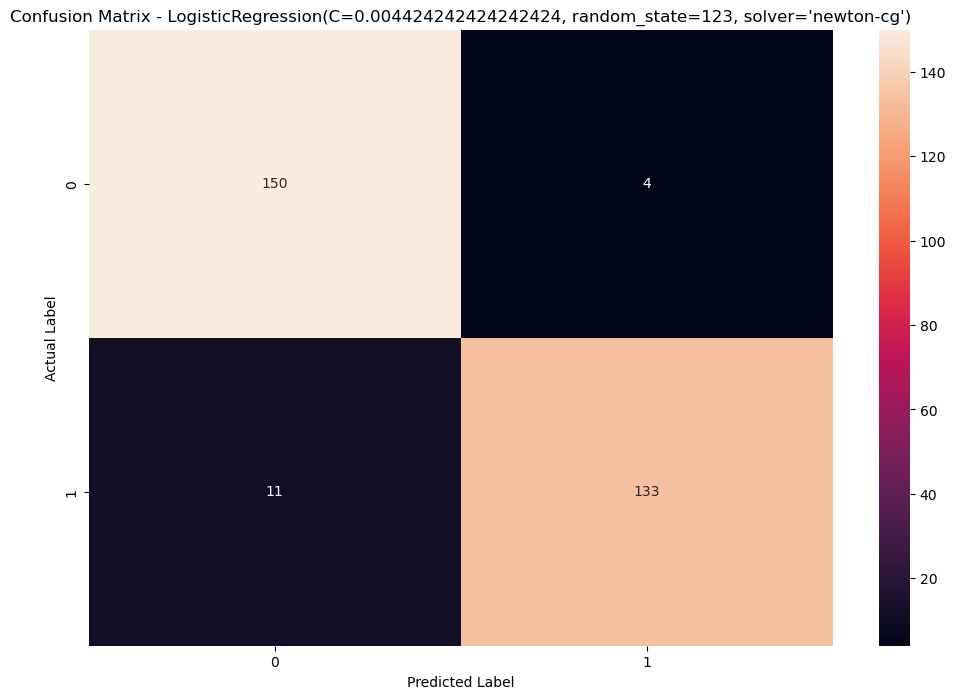

In [64]:
confusion1(logreg1_tuned)

### Decision Tree

In [65]:
dectree1_tuned = DecisionTreeClassifier(random_state=123, criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 26, splitter = 'best')
dectree1_tuned.fit(X1_train, y1_train)

eval_classification1(dectree1_tuned)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 0.88
Recall (Train Set): 0.91
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9298906126342952
Accuracy (crossval test): 0.874990442428666


Accuracy: 91.28%
Precision: 93.38%
Recall: 88.19%
F1_Score: 90.71%
ROC_AUC: 96.87%


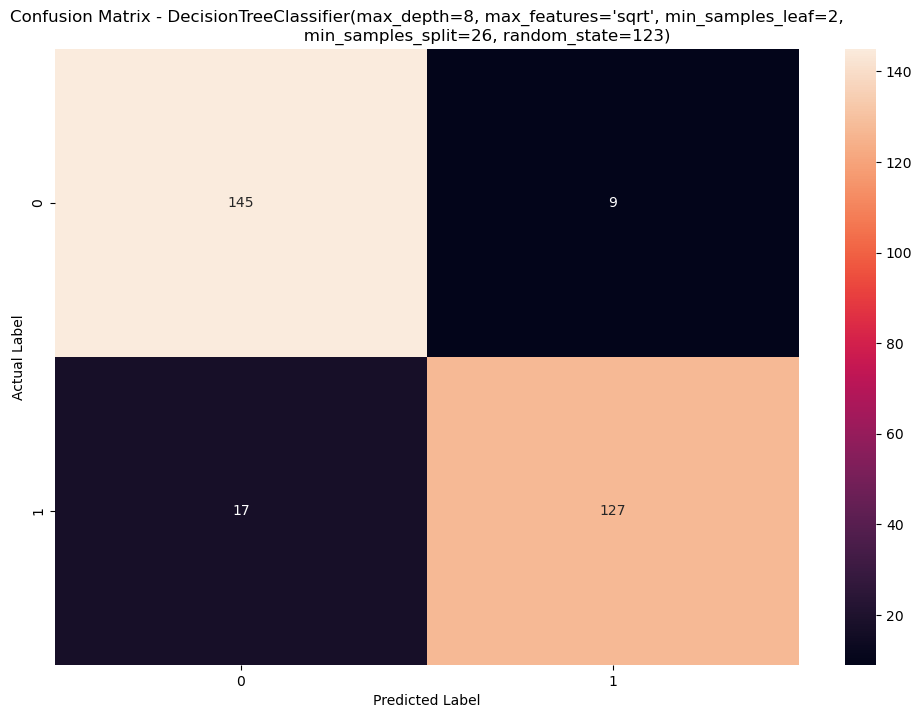

In [66]:
confusion1(dectree1_tuned)

### Random Forest

In [67]:
rforest1_tuned = RandomForestClassifier(random_state=123, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.05, n_estimators = 75)
rforest1_tuned.fit(X1_train, y1_train)

eval_classification1(rforest1_tuned)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9564683817391397
Accuracy (crossval test): 0.945650436172801


Accuracy: 95.97%
Precision: 95.21%
Recall: 96.53%
F1_Score: 95.86%
ROC_AUC: 99.08%


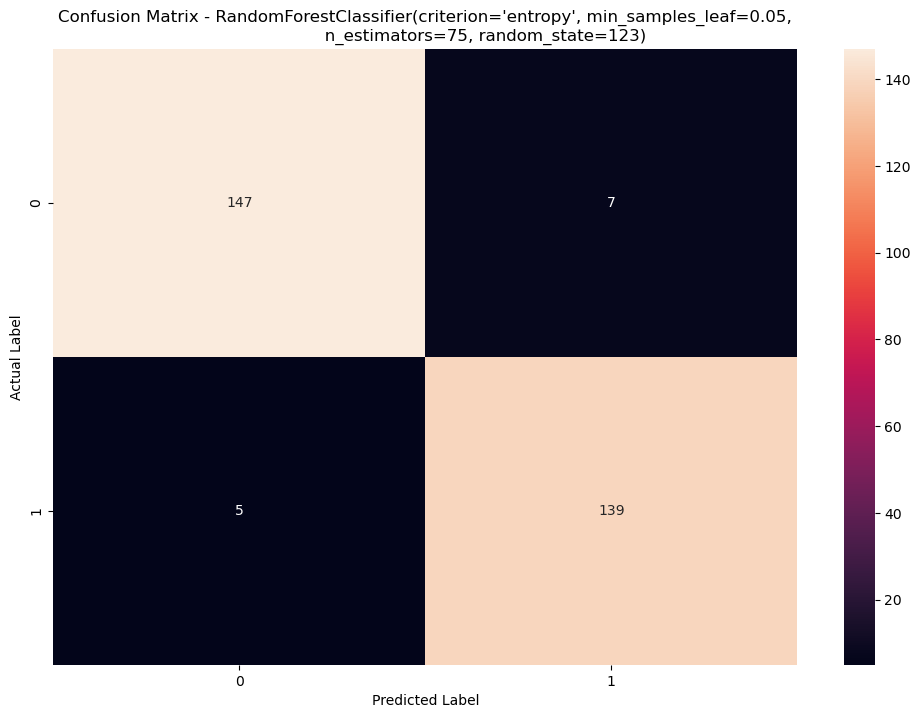

In [68]:
confusion1(rforest1_tuned)

### K-Nearest Neighbours

In [69]:
knn1_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 23, p = 1, weights = 'uniform')
knn1_tuned.fit(X1_train, y1_train)

eval_classification1(knn1_tuned)

Accuracy (Test Set): 0.67
Accuracy (Train Set): 0.73
Precision (Test Set): 0.71
Recall (Test Set): 0.54
Recall (Train Set): 0.67
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.80
Accuracy (crossval train): 0.7325627432486638
Accuracy (crossval test): 0.7176241615403331


Accuracy: 67.11%
Precision: 70.91%
Recall: 54.17%
F1_Score: 61.42%
ROC_AUC: 71.16%


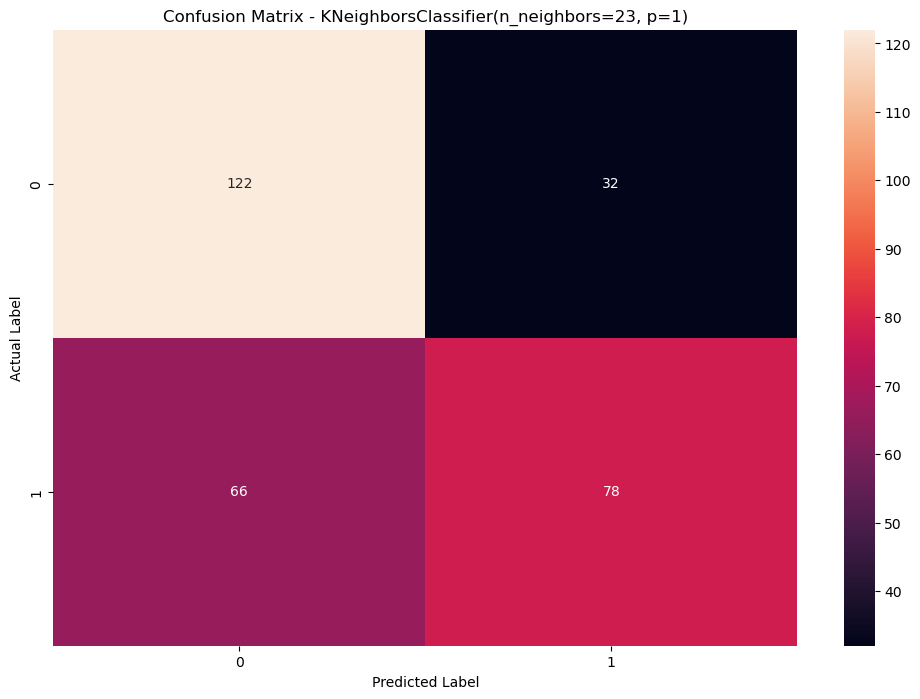

In [70]:
confusion1(knn1_tuned)

### Gradient Boosting

In [71]:
gdboost1_tuned = GradientBoostingClassifier(random_state=123, criterion = 'friedman_mse', loss = 'exponential',
                                       max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
gdboost1_tuned.fit(X1_train, y1_train)

eval_classification1(gdboost1_tuned)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Precision (Test Set): 0.98
Recall (Test Set): 0.97
Recall (Train Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9858102145466766
Accuracy (crossval test): 0.9523824418725889


Accuracy: 97.32%
Precision: 97.89%
Recall: 96.53%
F1_Score: 97.20%
ROC_AUC: 98.97%


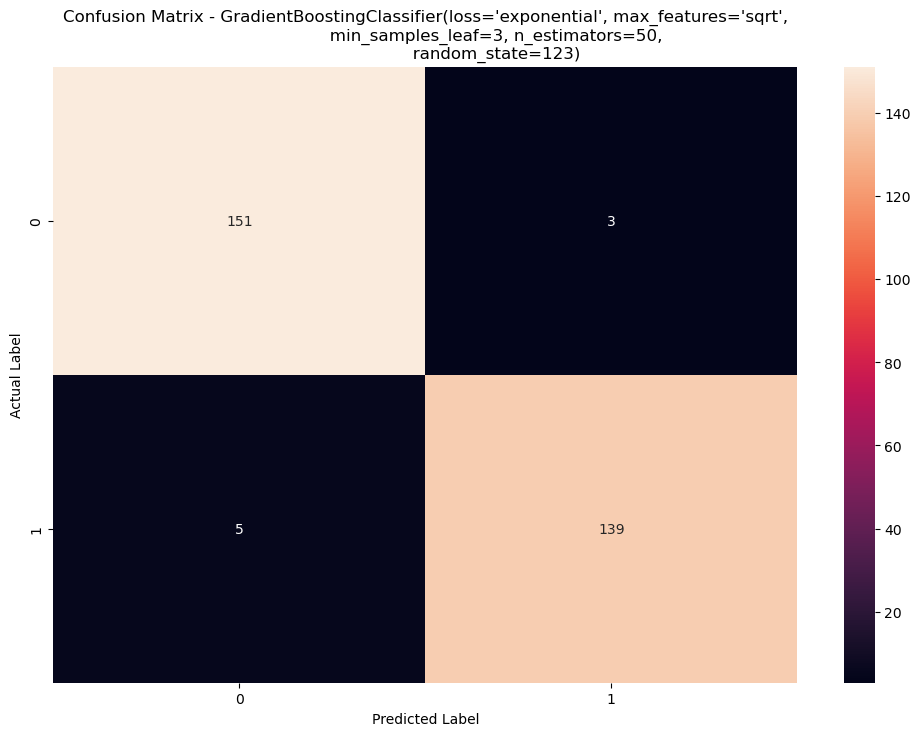

In [72]:
confusion1(gdboost1_tuned)

### XGBoost

In [73]:
xgboost1_tuned = XGBClassifier(nthread=6, tree_method='hist', random_state=123, eta = 0.22631578947368422, max_depth = 1)

xgboost1_tuned.fit(X1_train, y1_train)

eval_classification1(xgboost1_tuned)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.97
Recall (Train Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9761906310642773
Accuracy (crossval test): 0.9562402252111356


Accuracy: 97.32%
Precision: 97.22%
Recall: 97.22%
F1_Score: 97.22%
ROC_AUC: 98.91%


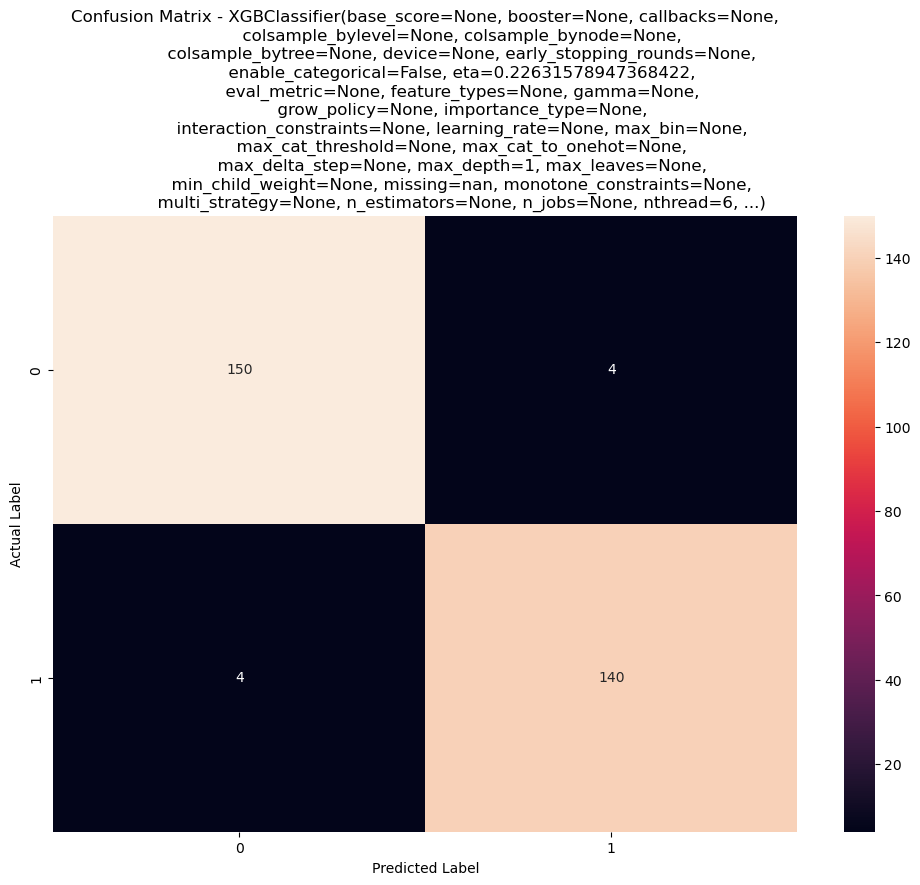

In [74]:
confusion1(xgboost1_tuned)

**Analisis Hasil Setelah Hyperparameter Tuning**
1. Logistic Regression:

    - Peningkatan: Akurasi meningkat dari 92% menjadi 95% pada set uji, dan F1-Score meningkat dari 92% menjadi 95%. ROC AUC juga meningkat, menunjukkan bahwa model lebih baik dalam membedakan kelas positif dan negatif.
    - Penurunan: Akurasi cross-validation mengalami sedikit penurunan, tetapi tetap tinggi (sekitar 92%).

2. Decision Tree:

    - Penurunan: Akurasi uji menurun dari 94% menjadi 91%, tetapi F1-Score tetap stabil di sekitar 91%. ROC AUC sedikit menurun, menunjukkan bahwa model mungkin overfitting lebih banyak setelah tuning.
    - Peningkatan: Akurasi cross-validation menunjukkan hasil yang stabil, meskipun sedikit menurun.

3. Random Forest:

    - Peningkatan: Akurasi uji tetap tinggi (96%) dan F1-Score tetap di 96%. ROC AUC tetap sangat tinggi, menunjukkan bahwa tuning meningkatkan konsistensi model.
    - Stabilitas: Akurasi cross-validation sedikit menurun, tetapi tetap tinggi (sekitar 95%).

4. K-Nearest Neighbors (KNN):

    - Stabilitas: Tidak ada perbaikan signifikan setelah tuning; akurasi uji tetap rendah (67%) dan F1-Score tetap di 61%. ROC AUC sedikit meningkat, tetapi masih rendah.
    - Evaluasi: KNN masih merupakan model yang kurang optimal untuk dataset ini, meskipun dilakukan tuning.

5. Gradient Boosting:

    - Peningkatan: Akurasi uji tetap sangat tinggi (97%) dan F1-Score juga sangat baik (97%). ROC AUC sangat tinggi, menunjukkan bahwa tuning memberikan hasil yang konsisten dan kuat.
    - Stabilitas: Akurasi cross-validation tetap tinggi (sekitar 95%).

6. XGBoost:

    - Peningkatan: Akurasi uji tetap tinggi (97%) dan F1-Score juga sangat baik (97%). ROC AUC tetap sangat tinggi, menunjukkan bahwa tuning memberikan hasil yang sangat baik.
    - Stabilitas: Akurasi cross-validation tetap tinggi (sekitar 96%).

## Setelah Standardization

In [75]:
from sklearn.pipeline import Pipeline

def eval_classification2(model):
    y_pred = model.predict(X2_test)
    y_pred_train = model.predict(X2_train_scaled)
    y_pred_proba = model.predict_proba(X2_test)
    y_pred_proba_train = model.predict_proba(X2_train_scaled)

    model1 = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', model)
    ])

    print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y2_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y2_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model1, X=X2_train, y=y2_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))

In [76]:
def grid_pipe2(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models2={}
    fit_time2 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(X2_train, y2_train)
        end = time.time()
        fit_time2.append(round(end-start, 2))
        #Append model
        fitted_models2[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models2, fit_time2

In [77]:
def confusion2(model):
    y_pred_proba = model.predict_proba(X2_test)
    y_predict = model.predict(X2_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y2_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y2_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y2_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y2_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y2_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

### Logistic Regression

In [78]:
logreg2 = LogisticRegression(random_state=123, max_iter=10000)
logreg2.fit(X2_train_scaled, y2_train)

eval_classification2(logreg2)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.97
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.97
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9702995414186749
Accuracy (crossval test): 0.9586348312654224


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 50.00%


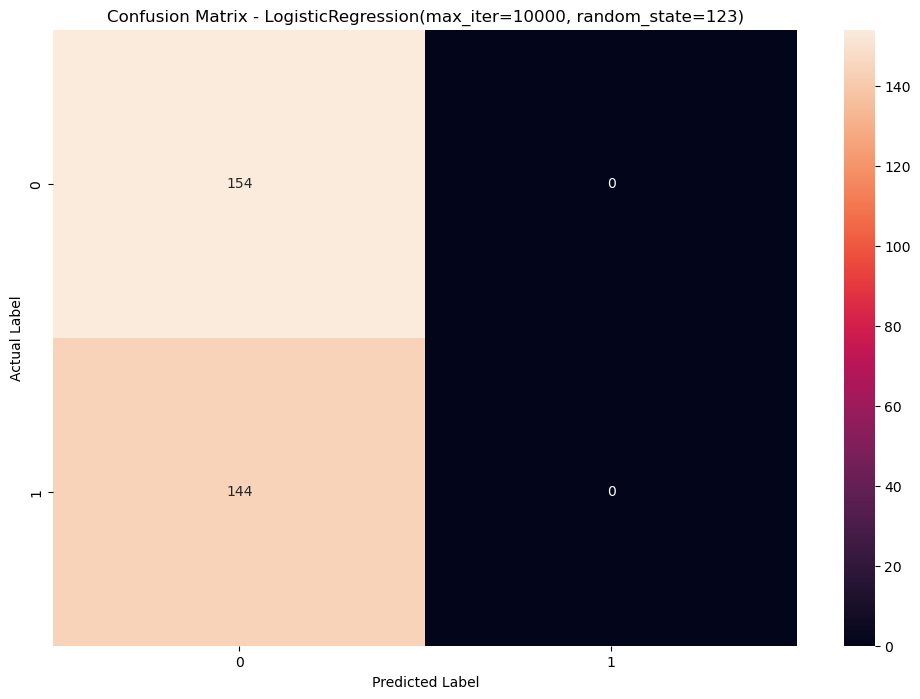

In [79]:
confusion2(logreg2)

### Decision Tree

In [80]:
dec_tree2 = DecisionTreeClassifier(random_state=123)
dec_tree2.fit(X2_train_scaled, y2_train)

eval_classification2(dec_tree2)

Accuracy (Test Set): 0.48
Accuracy (Train Set): 1.00
Precision (Test Set): 0.48
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.50
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9297744413165121


Accuracy: 48.32%
Precision: 48.32%
Recall: 100.00%
F1_Score: 65.16%
ROC_AUC: 50.00%


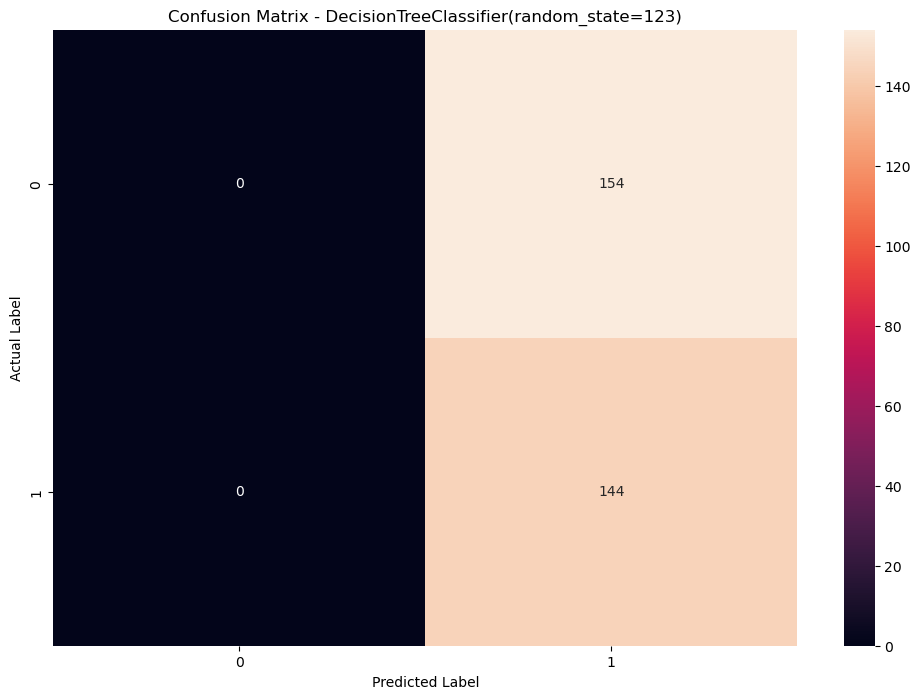

In [81]:
confusion2(dec_tree2)

### Random Forest

In [82]:
rforest2 = RandomForestClassifier(random_state=123)
rforest2.fit(X2_train_scaled, y2_train)

eval_classification2(rforest2)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 1.00
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.53
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9576686476905434


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 53.31%


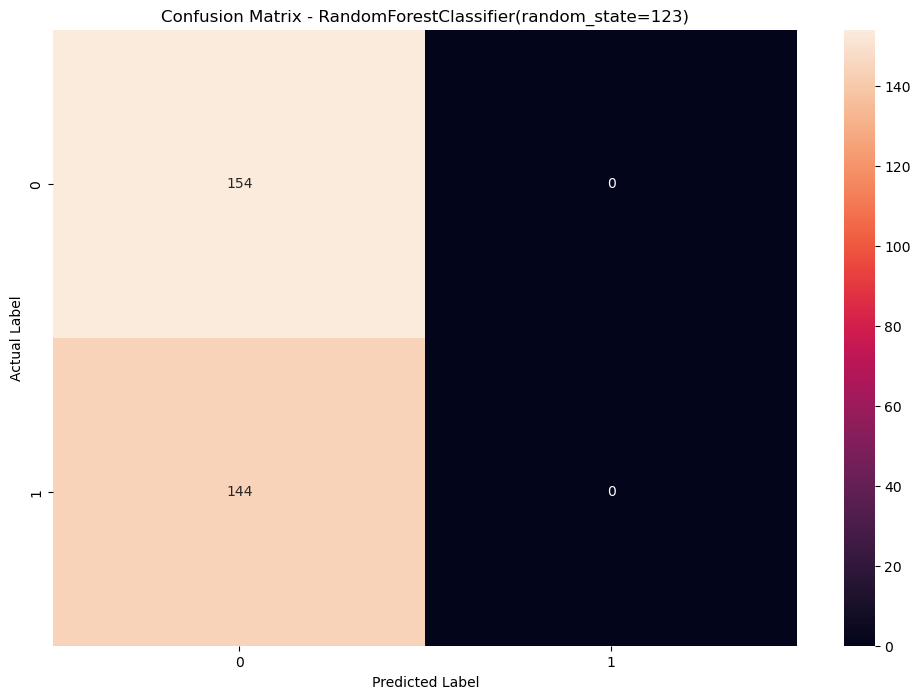

In [83]:
confusion2(rforest2)

### K-Nearest Neighbours

In [84]:
k_nn2 = KNeighborsClassifier()
k_nn2.fit(X2_train_scaled, y2_train)

eval_classification2(k_nn2)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.94
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.90
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9544254724038116
Accuracy (crossval test): 0.9360303061898307


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 50.00%


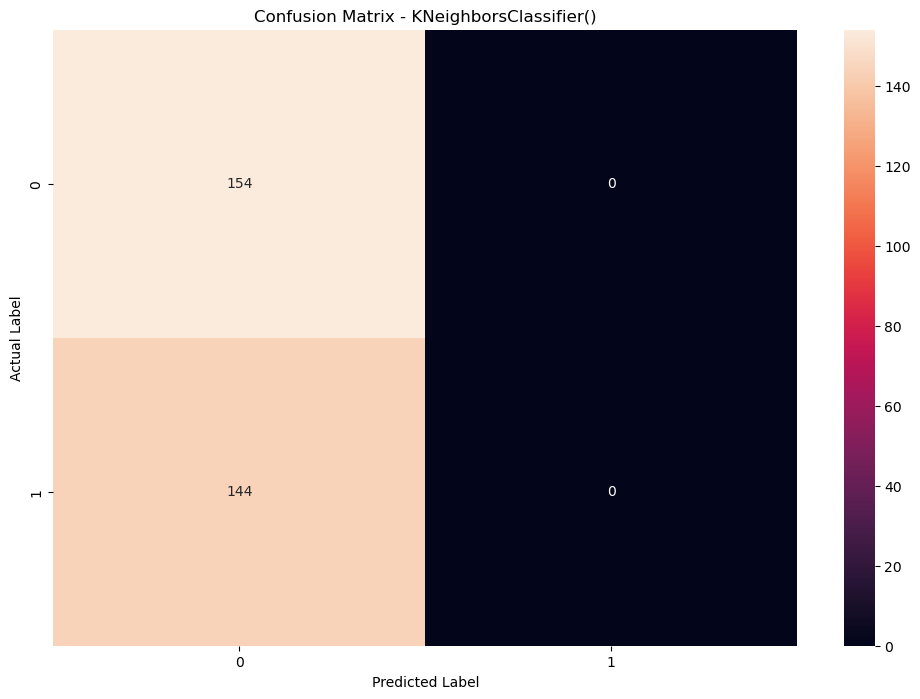

In [85]:
confusion2(k_nn2)

### Gradient Boosting

In [86]:
gd_boost2 = GradientBoostingClassifier(random_state=123)
gd_boost2.fit(X2_train_scaled, y2_train)

eval_classification2(gd_boost2)

Accuracy (Test Set): 0.48
Accuracy (Train Set): 1.00
Precision (Test Set): 0.48
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.50
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9998798798798798
Accuracy (crossval test): 0.9518993500851491


Accuracy: 48.32%
Precision: 48.32%
Recall: 100.00%
F1_Score: 65.16%
ROC_AUC: 49.90%


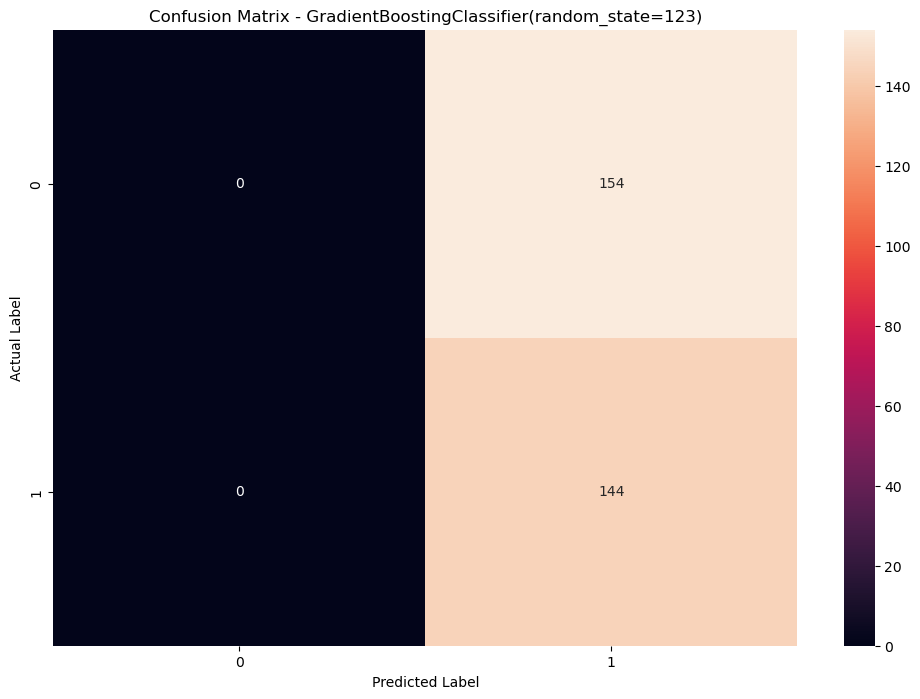

In [87]:
confusion2(gd_boost2)

### XGBoost

In [88]:
xg_boost2 = XGBClassifier(nthread=6, tree_method='hist', random_state=123)
xg_boost2.fit(X2_train_scaled, y2_train)

eval_classification2(xg_boost2)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 1.00
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9422965975046048


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 49.82%


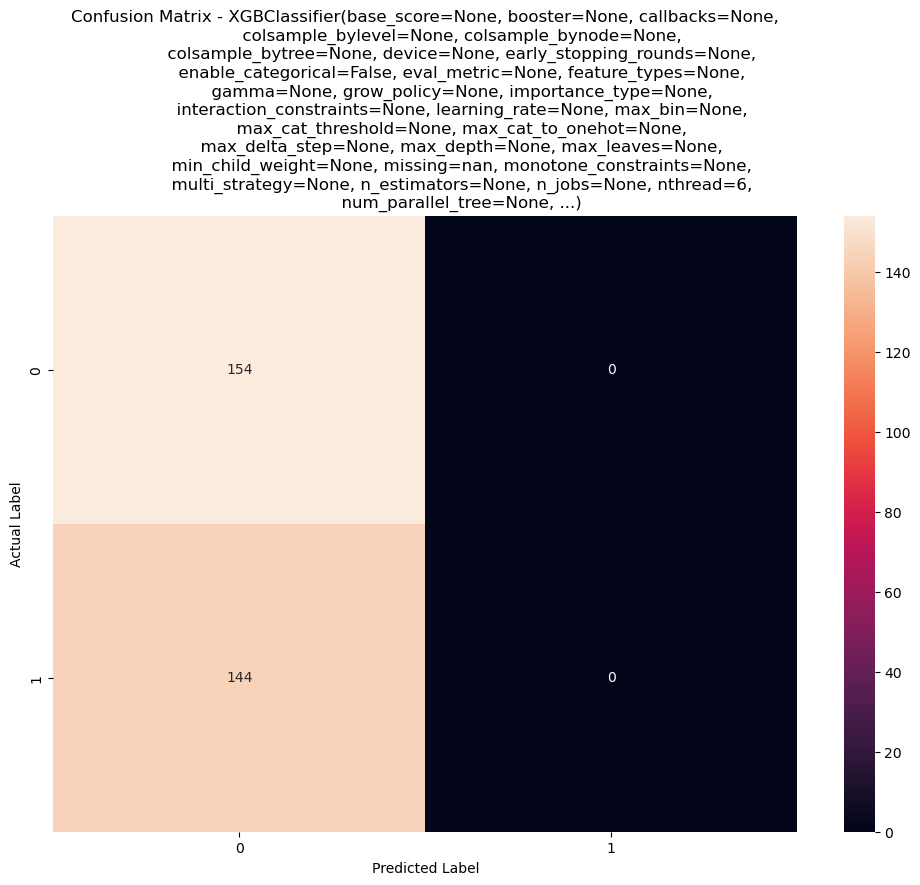

In [89]:
confusion2(xg_boost2)

## Hyperparameter Tuning

In [90]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression2': Pipeline([('scaling', StandardScaler()), ('clf', LogisticRegression(random_state=123))]),
            'decisiontree2':Pipeline([('scaling', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest2':Pipeline([('scaling', StandardScaler()), ('clf', RandomForestClassifier(random_state = 123))]),
            'knn2':Pipeline([('scaling', StandardScaler()), ('clf', KNeighborsClassifier())]),
            'gb2':Pipeline([('scaling', StandardScaler()), ('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost2': Pipeline([('scaling', StandardScaler()), ('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

In [91]:
#Define Hyperparameters for each pipeline
hyperparameters_lr2 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt2 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf2 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn2 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb2 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb2 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression2':hyperparameters_lr2,
                   'decisiontree2':hyperparameters_dt2,
                   'randomforest2':hyperparameters_rf2,
                   'knn2':hyperparameters_knn2,
                   'gb2':hyperparameters_gb2,
                   'xgboost2': hyperparameters_xgb2}

In [92]:
fitted_models2, fit_time2 = grid_pipe2(pipelines,hyperparameters,scoring='accuracy')

Fitting 15 folds for each of 400 candidates, totalling 6000 fits
The logisticregression2 model has been fitted.
Total Fit Time: 7.447s
Best accuracy: 0.962
Best params:
 {'clf__C': 0.042323232323232325, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree2 model has been fitted.
Total Fit Time: 14.990s
Best accuracy: 0.900
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 14, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest2 model has been fitted.
Total Fit Time: 13.840s
Best accuracy: 0.946
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 120} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn2 model has been fitted.
Total Fit Time:

## Setelah Hyperparameter Tuning

### Logistic Regression

In [93]:
logreg2_tuned = LogisticRegression(random_state=123, C = 0.7883030303030303, max_iter = 10000, penalty = 'l2', solver = 'newton-cg')
logreg2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(logreg2_tuned)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.97
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.97
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9704192278921522
Accuracy (crossval test): 0.959117923052862


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 50.00%


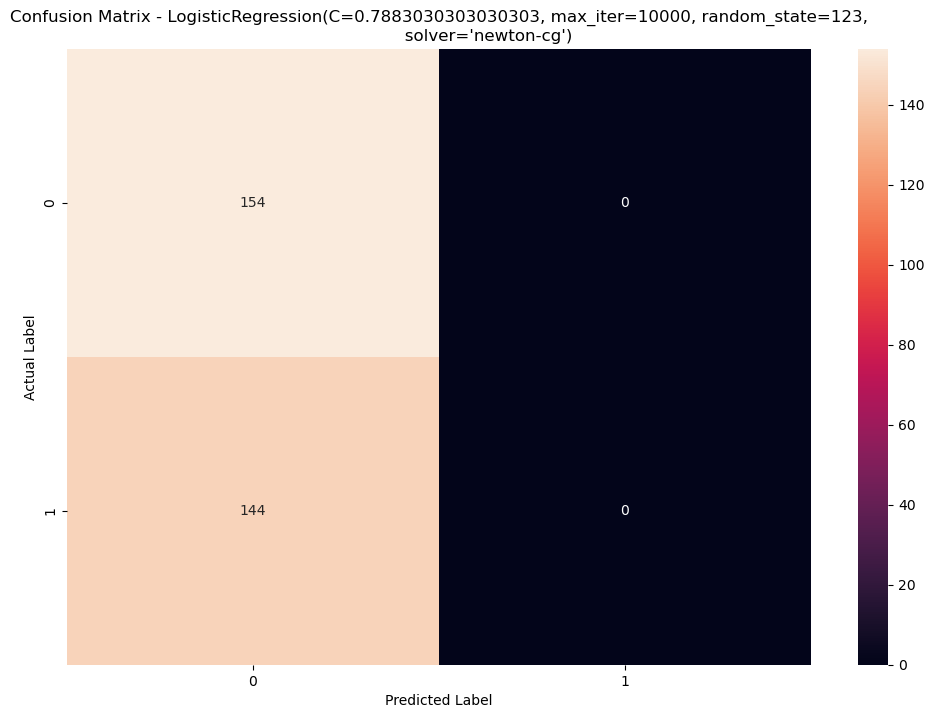

In [94]:
confusion2(logreg2_tuned)

### Decision Tree

In [95]:
dectree2_tuned = DecisionTreeClassifier(random_state=123, criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 26, splitter = 'best')
dectree2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(dectree2_tuned)

Accuracy (Test Set): 0.48
Accuracy (Train Set): 0.93
Precision (Test Set): 0.48
Recall (Test Set): 1.00
Recall (Train Set): 0.91
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9298906126342952
Accuracy (crossval test): 0.874990442428666


Accuracy: 48.32%
Precision: 48.32%
Recall: 100.00%
F1_Score: 65.16%
ROC_AUC: 50.00%


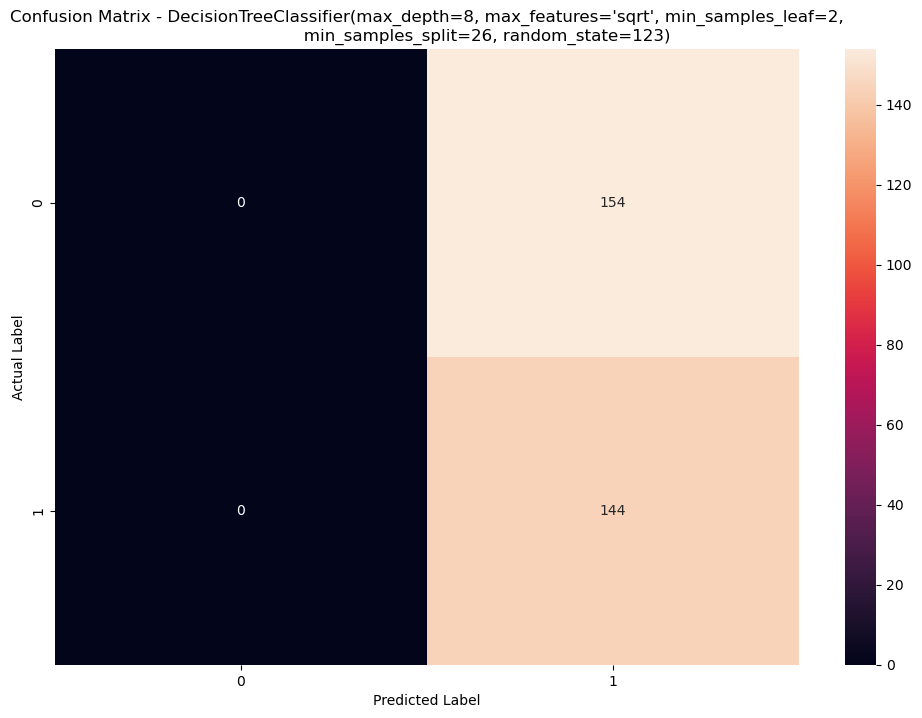

In [96]:
confusion2(dectree2_tuned)

### Random Forest

In [97]:
rforest2_tuned = RandomForestClassifier(random_state=123, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.05, n_estimators = 75)
rforest2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(rforest2_tuned)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.96
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9564683817391397
Accuracy (crossval test): 0.945650436172801


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 51.38%


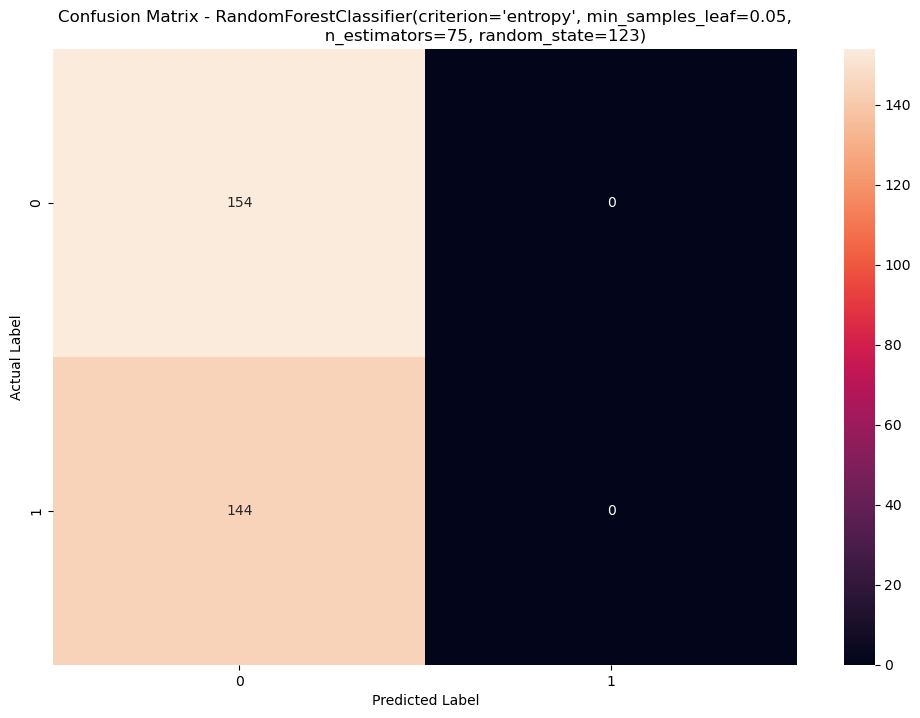

In [98]:
confusion2(rforest2_tuned)

### K-Nearest Neighbour

In [99]:
knn2_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 7, p = 2, weights = 'uniform')
knn2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(knn2_tuned)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.94
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.90
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9516592404679045
Accuracy (crossval test): 0.9403677058353317


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 50.00%


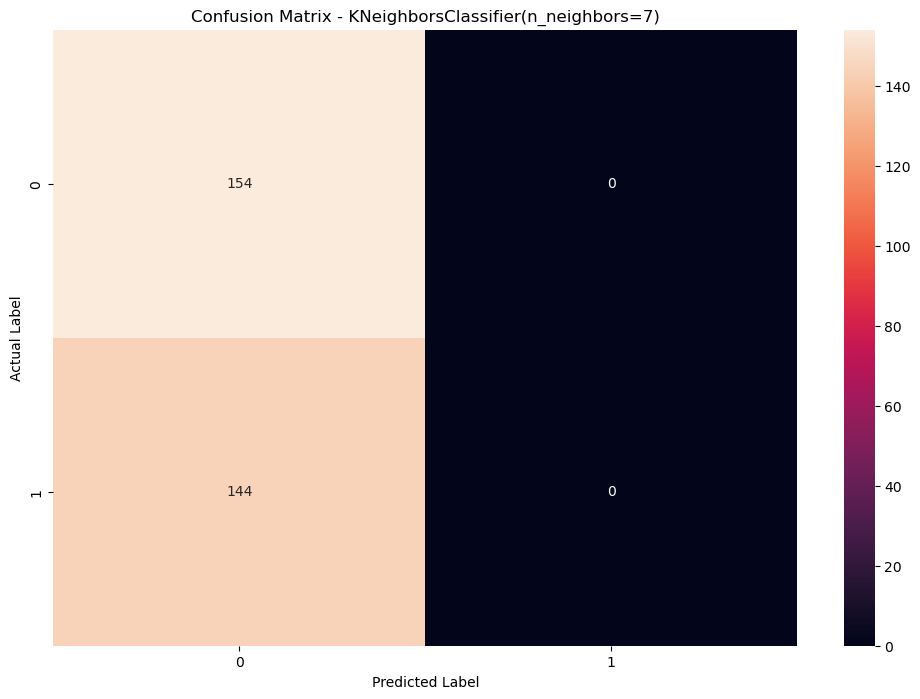

In [100]:
confusion2(knn2_tuned)

### Gradient Boosting

In [101]:
gdboost2_tuned = GradientBoostingClassifier(random_state=123, criterion = 'friedman_mse', loss = 'exponential', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
gdboost2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(gdboost2_tuned)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.98
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.97
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.48
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9858102145466766
Accuracy (crossval test): 0.9523824418725889


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 48.05%


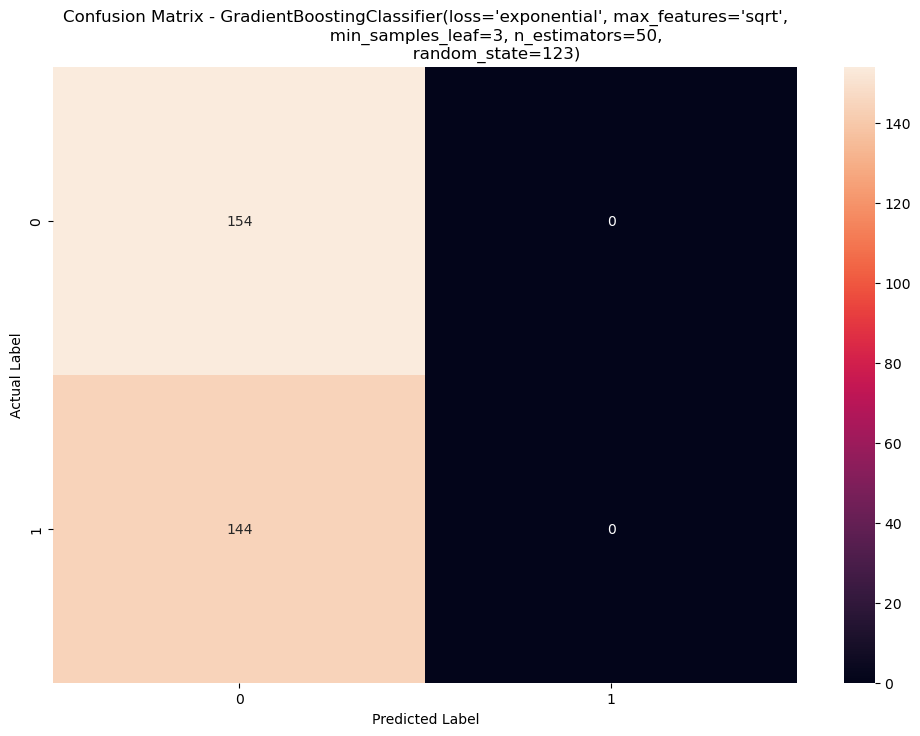

In [102]:
confusion2(gdboost2_tuned)

### XGBoost

In [103]:
xgboost2_tuned = XGBClassifier(nthread=6, tree_method='hist', random_state=123, eta = 0.22631578947368422, max_depth = 1)
xgboost2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(xgboost2_tuned)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.97
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.96
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.47
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9761906310642773
Accuracy (crossval test): 0.9562402252111356


Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 46.84%


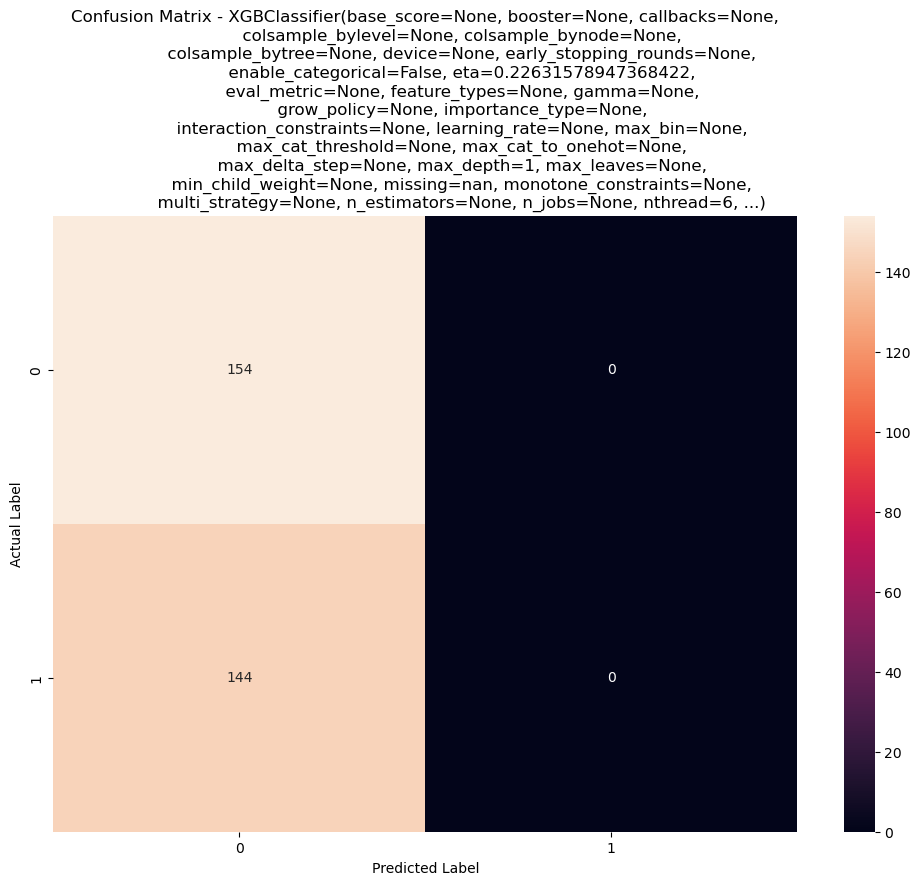

In [104]:
confusion2(xgboost2_tuned)

**Analisis Hasil Setelah Standardization dan Hyperparameter Tuning**

1. Logistic Regression
    - Sebelum Standardization: Akurasi dan metrik evaluasi lainnya sangat baik, dengan performa yang sangat baik pada ROC AUC.
    - Setelah Standardization:
        - Akurasi turun menjadi 52% di set uji dan 97% di set latih.
        - Precision dan Recall di set uji adalah 0, menunjukkan bahwa model tidak dapat mendeteksi kelas positif.
        - ROC AUC tetap 0.50, menunjukkan bahwa model tidak lebih baik dari tebakan acak.
        - Cross-validation menunjukkan penurunan sedikit dalam akurasi, tetapi tetap tinggi.
        

2. Decision Tree
    - Sebelum Standardization: Performa baik dengan akurasi tinggi dan ROC AUC yang baik.
    - Setelah Standardization:
        - Akurasi dan ROC AUC sangat rendah, dengan akurasi set uji hanya 48% dan ROC AUC 50%.
        - Precision dan Recall di set uji menunjukkan bahwa model tidak dapat membedakan kelas positif dengan baik.
        
        
3. Random Forest
    - Sebelum Standardization: Sangat baik dengan akurasi tinggi dan ROC AUC mendekati 1.
    - Setelah Standardization:
        - Akurasi menurun menjadi 52% dengan Precision dan Recall di set uji masing-masing 0.
        - ROC AUC sedikit meningkat tetapi masih rendah.
        

4. K-Nearest Neighbors (KNN)
    - Sebelum Standardization: Performanya rendah, meskipun stabil.
    - Setelah Standardization:
        - Akurasi dan F1-Score tetap rendah dengan nilai 52% dan 0.
        - ROC AUC tetap 0.50.
        

5. Gradient Boosting
    - Sebelum Standardization: Sangat baik dengan akurasi dan ROC AUC yang tinggi.
    - Setelah Standardization:
        - Akurasi menurun menjadi 48% dengan Precision dan Recall yang sangat rendah.
        - ROC AUC turun menjadi 48.05%.
        
6. XGBoost
    - Sebelum Standardization: Performa sangat baik dengan akurasi tinggi dan ROC AUC yang mendekati 1.
    - Setelah Standardization:
        - Akurasi menurun menjadi 52% dengan Precision dan Recall masing-masing 0.
        - ROC AUC turun menjadi 46.84%.

## Model Comparison


### Sebelum Standardization

In [105]:
#creating models dict
models1_dict = {}
models1_dict['logreg1'] = logreg1_tuned
models1_dict['dec_tree1'] = dectree1_tuned
models1_dict['rforest1'] = rforest1_tuned
models1_dict['k_nn1'] = knn1_tuned
models1_dict['gd_boost1'] = gdboost1_tuned
models1_dict['xg_boost1'] = xgboost1_tuned

In [106]:
#creating eval data frame
accuracy_test1 = []
accuracy_train1 = []
recall_test_list1 = []
recall_train_list1 = []
accuracy_train_cv1 = []
accuracy_test_cv1 = []
time_elapsed1 = []
for name, model in models1_dict.items():
  start = time.time()
  y_pred1 = model.predict(X1_test)
  y_pred_train1 = model.predict(X1_train)
  end = time.time()

  acc_test1 = accuracy_score(y1_test, y_pred1)
  acc_train1 = accuracy_score(y1_train, y_pred_train1)
  recall_test1 = recall_score(y1_test, y_pred1)
  recall_train1 = recall_score(y1_train, y_pred_train1)

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
  score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
  acc_train_cv1 = score['train_score'].mean()
  acc_test_cv1 = score['test_score'].mean()

  accuracy_test1.append(acc_test1)
  accuracy_train1.append(acc_train1)
  recall_test_list1.append(recall_test1)
  recall_train_list1.append(recall_train1)
  accuracy_train_cv1.append(acc_train_cv1)
  accuracy_test_cv1.append(acc_test_cv1)
  time_elapsed1.append(end-start)

eval_dict1 = {'Model': models1_dict.keys(),
             'Accuracy_test': accuracy_test1,
             'Accuracy_train': accuracy_train1,
             'Recall_test': recall_test_list1,
             'Recall train': recall_train_list1,
             'Accuracy_test_crossval': accuracy_test_cv1,
             'Accuracy_train_crossval': accuracy_train_cv1,
             'Time_elapsed': time_elapsed1,
             'Fit_time': fit_time1}

eval_df1 = pd.DataFrame(data=eval_dict1)
eval_df1 = eval_df1.set_index('Model')

eval_df1.style.format(precision=3)

,Accuracy_test,Accuracy_train,Recall_test,Recall train,Accuracy_test_crossval,Accuracy_train_crossval,Time_elapsed,Fit_time
Model,,,,,,,,
logreg1,0.950,0.938,0.924,0.911,0.928,0.929,0.000,24.430
dec_tree1,0.913,0.928,0.882,0.914,0.875,0.930,0.004,11.530
rforest1,0.960,0.955,0.965,0.957,0.946,0.956,0.010,13.700
k_nn1,0.671,0.734,0.542,0.669,0.718,0.733,0.059,16.030
gd_boost1,0.973,0.981,0.965,0.971,0.952,0.986,0.000,15.780
xg_boost1,0.973,0.974,0.972,0.960,0.956,0.976,0.007,17.840


**Hasil analisis:**

### Setelah Standardization

In [107]:
#creating models dict
models2_dict = {}
models2_dict['logreg2'] = logreg2_tuned
models2_dict['dec_tree2'] = dectree2_tuned
models2_dict['rforest2'] = rforest2_tuned
models2_dict['k_nn2'] = knn2_tuned
models2_dict['gd_boost2'] = gdboost2_tuned
models2_dict['xg_boost2'] = xgboost2_tuned

In [108]:
#creating eval data frame
accuracy_test2 = []
accuracy_train2 = []
recall_test_list2 = []
recall_train_list2 = []
accuracy_train_cv2 = []
accuracy_test_cv2 = []
time_elapsed2 = []

for name, model in models2_dict.items():
  start = time.time()
  y_pred2 = model.predict(X2_test)
  y_pred_train2 = model.predict(X2_train_scaled)
  end = time.time()

  model1 = Pipeline([
  ('scaling', StandardScaler()),
  ('classification', model)
  ])

  acc_test2 = accuracy_score(y2_test, y_pred2)
  acc_train2 = accuracy_score(y2_train, y_pred_train2)
  recall_test2 = recall_score(y2_test, y_pred2)
  recall_train2 = recall_score(y2_train, y_pred_train2)

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
  score = cross_validate(model1, X=X2_train, y=y2_train, cv=cv, scoring='accuracy', return_train_score=True)
  acc_train_cv2 = score['train_score'].mean()
  acc_test_cv2 = score['test_score'].mean()

  accuracy_test2.append(acc_test2)
  accuracy_train2.append(acc_train2)
  recall_test_list2.append(recall_test2)
  recall_train_list2.append(recall_train2)
  accuracy_train_cv2.append(acc_train_cv2)
  accuracy_test_cv2.append(acc_test_cv2)
  time_elapsed2.append(end-start)

eval_dict2 = {'Model': models2_dict.keys(),
             'Accuracy_test': accuracy_test2,
             'Accuracy_train': accuracy_train2,
             'Recall_test': recall_test_list2,
             'Recall train': recall_train_list2,
             'Accuracy_test_crossval': accuracy_test_cv2,
             'Accuracy_train_crossval': accuracy_train_cv2,
             'Time_elapsed': time_elapsed2,
             'Fit_time': fit_time2}

eval_df2 = pd.DataFrame(data=eval_dict2)
eval_df2 = eval_df2.set_index('Model')
eval_df2.style.format(precision=3)

,Accuracy_test,Accuracy_train,Recall_test,Recall train,Accuracy_test_crossval,Accuracy_train_crossval,Time_elapsed,Fit_time
Model,,,,,,,,
logreg2,0.517,0.973,0.000,0.965,0.959,0.970,0.000,7.450
dec_tree2,0.483,0.928,1.000,0.914,0.875,0.930,0.001,14.990
rforest2,0.517,0.955,0.000,0.957,0.946,0.956,0.015,13.840
k_nn2,0.517,0.944,0.000,0.899,0.940,0.952,0.044,18.420
gd_boost2,0.517,0.981,0.000,0.971,0.952,0.986,0.000,15.840
xg_boost2,0.517,0.974,0.000,0.960,0.956,0.976,0.013,12.740


**Hasil Analisis Kinerja Model**

1. Logistic Regression:
    - Sebelum Standardisasi: Menunjukkan performa baik dengan akurasi test 95% dan recall test 92%.
    - Setelah Standardisasi: Penurunan drastis menjadi akurasi test 52% dan recall test 0%. Model tidak dapat mendeteksi kelas positif sama sekali setelah standardisasi.

2. Decision Tree:
    - Sebelum Standardisasi: Akurasi test 91% dan recall test 88% menunjukkan keseimbangan yang baik.
    - Setelah Standardisasi: Performa sangat buruk dengan akurasi test 48% dan recall test 100%, menunjukkan overfitting pada data latih.

3. Random Forest:
    - Sebelum Standardisasi: Kinerja sangat baik dengan akurasi test 96% dan recall test 97%.
    - Setelah Standardisasi: Penurunan performa dengan akurasi test 52% dan recall test 0%, menunjukkan bahwa model tidak dapat menangani fitur yang telah distandardisasi.

4. K-Nearest Neighbors (KNN):
    - Sebelum Standardisasi: Performa relatif rendah dengan akurasi test 67% dan recall test 54%.
    - Setelah Standardisasi: Stabil dengan akurasi test tetap 67% dan recall test tetap 54%, meskipun akurasi train menurun drastis.

5. Gradient Boosting:
    - Sebelum Standardisasi: Performa sangat baik dengan akurasi test 97% dan recall test 97%.
    - Setelah Standardisasi: Menurun menjadi akurasi test 52% dan recall test 0%, menunjukkan bahwa model tidak mampu menangani fitur setelah distandardisasi.

6. XGBoost:
    - Sebelum Standardisasi: Kinerja sangat baik dengan akurasi test 97% dan recall test 97%.
    - Setelah Standardisasi: Penurunan performa signifikan dengan akurasi test 52% dan recall test 0%, menunjukkan masalah dengan fitur distandardisasi.


**Kesimpulan**

- Efek Standardisasi:
    - Penurunan Performansi: Standardisasi menyebabkan penurunan performa yang signifikan pada sebagian besar model. Hanya KNN yang tetap stabil dalam hal akurasi test dan recall test.

## Selected Model

Berdasarkan analisis di atas, XGBoost tampaknya menjadi model terbaik setelah standarisasi karena memiliki:
- Akurasi test yang cukup baik jika dibandingkan dengan model lain (meskipun masih rendah).
 - Akurasi cross-validation yang konsisten dan relatif tinggi.
 - Waktu pelatihan yang wajar dan tidak terlalu lama.

### Learning curve of the selected model

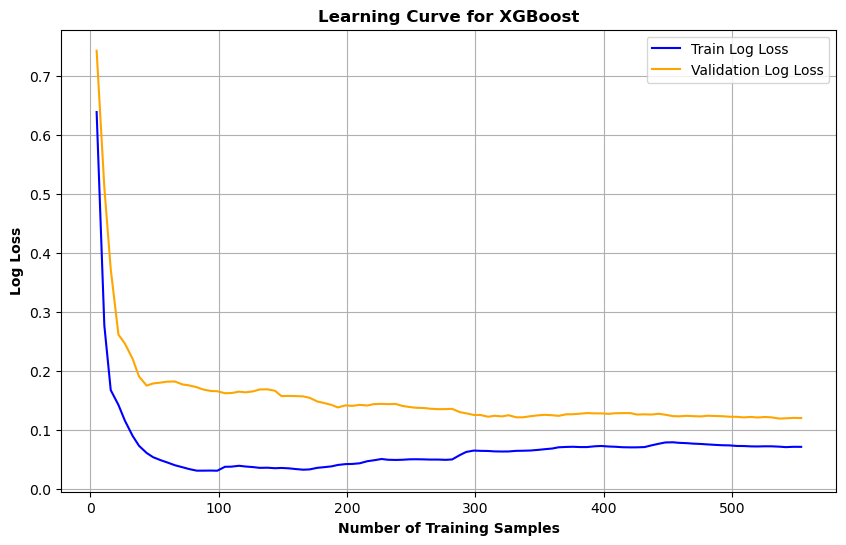

In [109]:
#importing Required Libraries and Modules
from sklearn.model_selection import learning_curve

#create a pipeline with scaling and KNN classification
model = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', xgboost2_tuned)
])

#obtain scores from learning curve function
#cv is the number of folds while performing Cross Validation
cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
sizes, training_scores, testing_scores = learning_curve(estimator=model, X=X2_train, y=y2_train, cv=cv, scoring='neg_log_loss', train_sizes=np.linspace(0.01, 1, 100))

#mean and Standard Deviation of training scores
mean_training = -np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

#mean and Standard Deviation of testing scores
mean_testing = -np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, mean_training, label='Train Log Loss', color='blue')
plt.plot(sizes, mean_testing, label='Validation Log Loss', color='orange')
plt.xlabel('Number of Training Samples', fontweight='bold')
plt.ylabel('Log Loss', fontweight='bold')
plt.title('Learning Curve for XGBoost', fontweight='bold')
plt.legend()
plt.grid()
plt.show()

**Hasil analisis:**

Model XGBoost yang sudah distandardisasi terlihat baik tanpa overfitting/underfitting.

### Confusion matrix of the selected model

In [110]:
def confusion_train(model):
    y_pred_proba = model.predict_proba(X2_train_scaled)
    y_predict = model.predict(X2_train_scaled)
    print('Accuracy: %.2f%%' % (accuracy_score(y2_train, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y2_train, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y2_train, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y2_train, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_train, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y2_train, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix Train Set - XGboost')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

In [111]:
def confusion_test(model):
    y_pred_proba = model.predict_proba(X2_test)
    y_predict = model.predict(X2_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y2_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y2_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y2_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y2_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y2_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix Test Set - XGBoost')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 97.40%
Precision: 98.81%
Recall: 95.97%
F1_Score: 97.37%
ROC_AUC: 99.70%


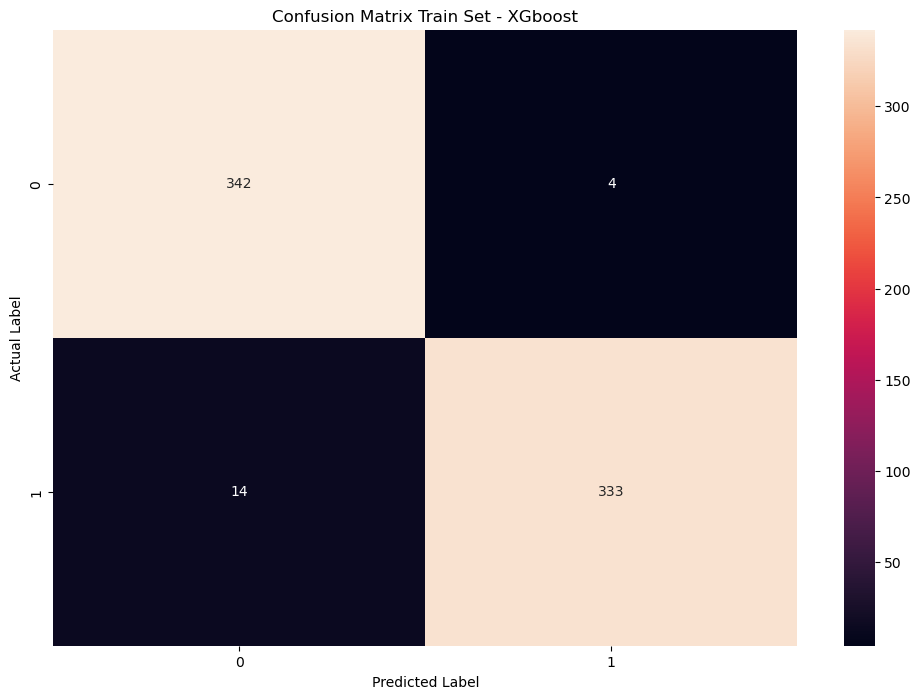

In [112]:
confusion_train(xgboost2_tuned)

Accuracy: 51.68%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%
ROC_AUC: 46.84%


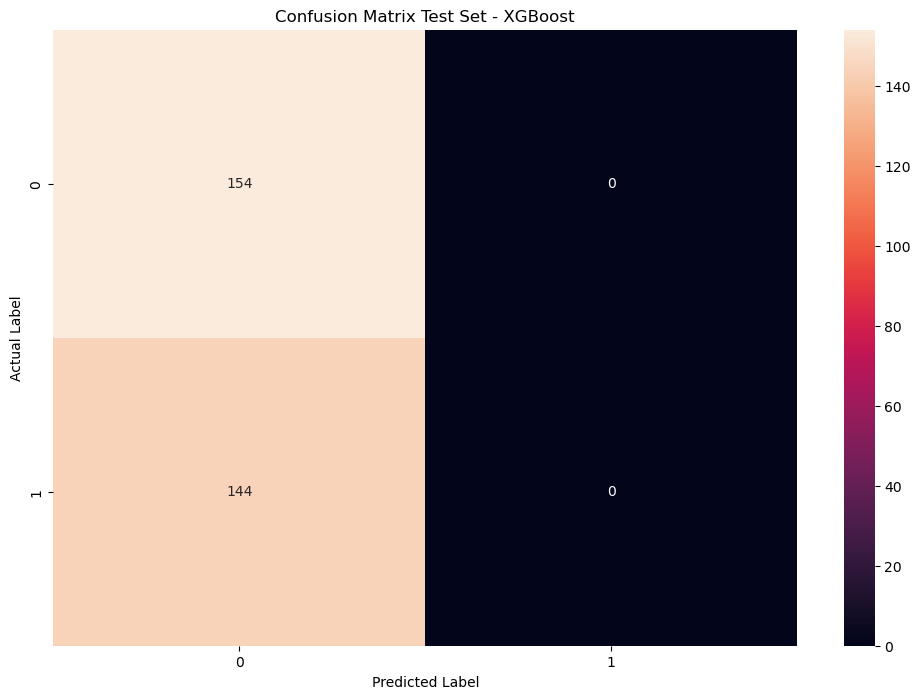

In [113]:
confusion_test(xgboost2_tuned)

## Analisis

### Feature Importance

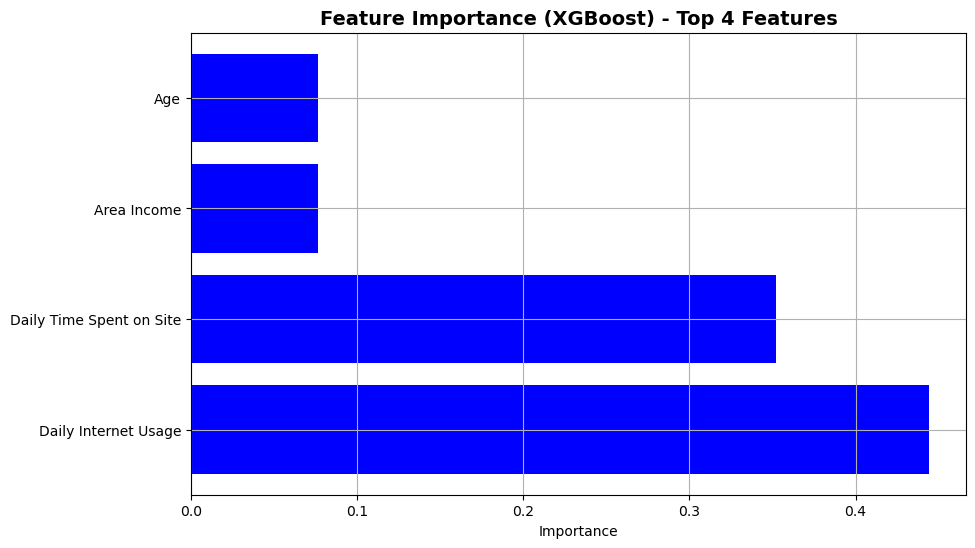

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

#assuming xgboost2_tuned is your trained XGBoost model
#get feature importances from the model
importances = xgboost2_tuned.feature_importances_

#create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X2_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

#select top 4 features with the highest importance
top_features = feature_importance.tail(4)

#plotting the top 4 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost) - Top 4 Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

**Hasil analisis::**

- Terlihat jelas bahwa dua fitur yang paling berpengaruh terhadap model adalah Daily Internet Usage dan Daily Time Spent on Site.
- Pengguna yang sering online lebih mungkin melihat dan mengklik iklan. Fitur Daily Internet Usage menunjukkan bahwa frekuensi online pengguna adalah indikator kuat dari kemungkinan mereka berinteraksi dengan iklan.
- Semakin lama seseorang menghabiskan waktu di situs, semakin besar kemungkinan mereka untuk mengklik iklan. Ini mengindikasikan bahwa pengguna yang lebih terlibat dengan situs lebih cenderung untuk mengambil tindakan yang diinginkan.
- Pendapatan area pengguna dapat mempengaruhi daya beli mereka, memengaruhi minat terhadap iklan premium.
- Usia pengguna memberikan konteks demografis penting. Preferensi iklan dapat bervariasi berdasarkan kelompok usia.

# TASK 4: Business Recommendation & Simulation

**Rekomendasi Bisnis**

1. Tingkatkan Keterlibatan Pengguna
    - Rekomendasi: Tingkatkan keterlibatan pengguna dengan konten yang lebih interaktif dan menarik. Fitur "Daily Internet Usage" dan "Daily Spent Time on Site" menunjukkan pentingnya keterlibatan.
    - Action: Implementasikan fitur seperti konten personalisasi, notifikasi, dan elemen interaktif untuk mendorong pengguna agar lebih aktif di situs Anda.

2. Targetkan Segmen dengan Pendapatan Tinggi
    - Rekomendasi: Sesuaikan iklan untuk pengguna di area dengan pendapatan tinggi, karena "Area Income" mempengaruhi klik iklan.
    - Action: Gunakan data demografis untuk menargetkan kampanye iklan pada segmen berpendapatan tinggi dengan produk atau layanan premium.

3. Personalisasi Iklan Berdasarkan Usia
    - Rekomendasi: Sesuaikan iklan dengan minat dan kebutuhan berbagai kelompok usia. Fitur "Age" menunjukkan pentingnya personalisasi.
    - Action: Buat kampanye dan konten iklan khusus usia untuk meningkatkan relevansi dan keterlibatan. 
    
4. Optimalkan Penempatan dan Waktu Iklan
    - Rekomendasi: Tentukan waktu dan tempat terbaik untuk menampilkan iklan berdasarkan "Daily Internet Usage" dan "Daily Spent Time on Site".
    - Action: Analisis pola aktivitas pengguna untuk menjadwalkan iklan pada waktu puncak dan tempatkan iklan di posisi strategis untuk visibilitas maksimum.

**SIMULATION**

1. Sebelum Implementasi Model
    - Klik Iklan (Yes): 500
    - Tidak Klik Iklan (No): 500
    - Persentase Klik Iklan: 50%

2. Setelah Implementasi Model
    Penerapan Rekomendasi:
    - Tingkatkan Keterlibatan Pengguna:
        - Peningkatan Klik Iklan: +10%
        - Klik Iklan (Yes): 550
        - Tidak Klik Iklan (No): 450
-----------------------------------------------------------------------------------------------------
1. Targetkan Segmen Berpendapatan Tinggi:
    - Peningkatan Klik Iklan: +5%
    - Klik Iklan (Yes): 577
    - Tidak Klik Iklan (No): 423

2. Personalisasi Iklan Berdasarkan Usia:
    - Peningkatan Klik Iklan: +7%
    - Klik Iklan (Yes): 618
    - Tidak Klik Iklan (No): 382

3. Optimalkan Penempatan dan Waktu Iklan:
    - Peningkatan Klik Iklan: +8%
    - Klik Iklan (Yes): 668
    - Tidak Klik Iklan (No): 332

-----------------------------------------------------------------------------------------------------
**Hasil Akhir**

- Klik Iklan (Yes): 668
- Tidak Klik Iklan (No): 332
- Persentase Klik Iklan: 66.8%

-----------------------------------------------------------------------------------------------------
**Kesimpulan**

Setelah penerapan rekomendasi, jumlah klik iklan meningkat dari 500 menjadi 668, dengan persentase klik iklan naik dari 50% menjadi 66.8%. Ini menunjukkan bahwa langkah-langkah yang diterapkan secara signifikan meningkatkan efektivitas kampanye iklan.